In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [2]:
# import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#0000FF', '#800070', '#FFFF00', '#005000'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.gaussian_process.kernels import RBF, Matern


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score


from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')




In [3]:
# import dataset and view
customer_churn = pd.read_csv('customer_churn.csv')
customer_churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [4]:
# |||(EDA) Exploratory Data ANalysis|||||
# checking the dataset information
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Summary of Dataset
customer_churn.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [6]:
# Dataset Shape
customer_churn.shape

(7043, 21)

In [7]:
# checking for column values
customer_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# checking for data type
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Convert 'TotalCharges' to numeric
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')
customer_churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

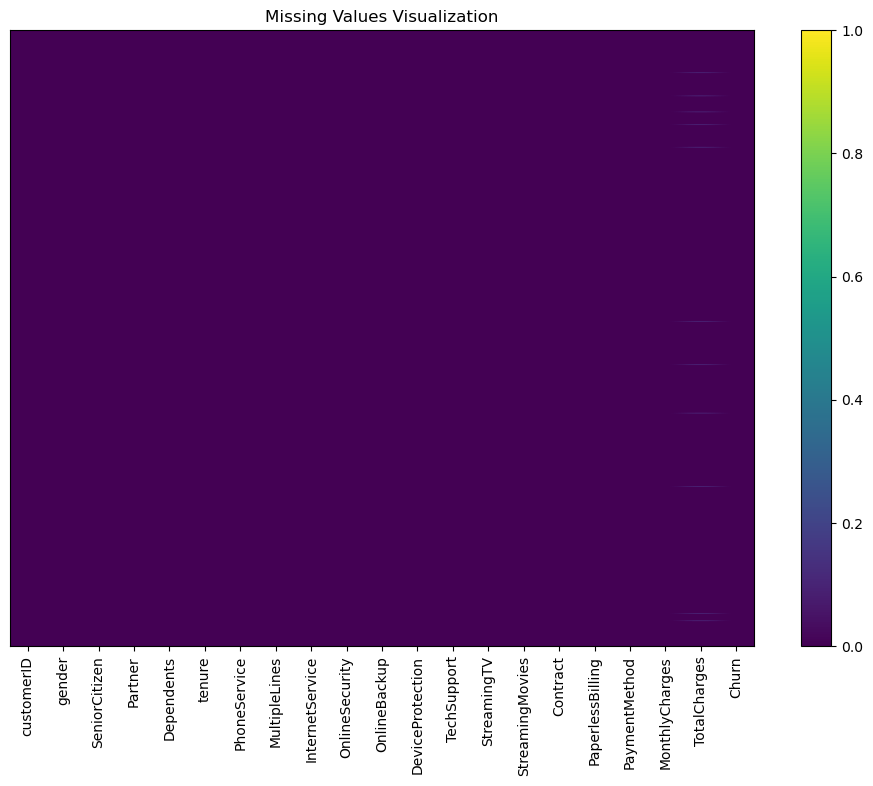

In [10]:
# Visualize missing values as a matrix
plt.figure(figsize=(12, 8))
plt.imshow(customer_churn.isnull(), cmap='viridis', aspect='auto')
plt.title('Missing Values Visualization')
plt.xticks(range(len(customer_churn.columns)), customer_churn.columns, rotation=90)
plt.yticks([])
plt.colorbar()
plt.show()

In [11]:
# REmove custumer id
customer_churn = customer_churn.drop(['customerID'], axis = 1)
customer_churn

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

In [12]:
# Convert 'TotalCharges' column to numeric, replacing non-numeric values with NaN,
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn.TotalCharges, errors='coerce')
customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

from the Above, Only the TotalCharge has 11 missing value

In [13]:
# Convert 'SeniorCitizen' to object (categorical) and replace values
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].replace({1: 'Yes', 0: 'No'}).astype('object')
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# handling NaN values in TotalCharges
customer_churn[np.isnan(customer_churn['TotalCharges'])]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


In [15]:
# Identify the index values of rows where 'tenure' column has a value of 0
customer_churn[customer_churn['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
# Drop rows where 'tenure' column has a value of 0
customer_churn.drop(labels=customer_churn[customer_churn['tenure'] == 0].index, axis=0, inplace=True)
customer_churn[customer_churn['tenure'] == 0].index

Index([], dtype='int64')

In [17]:
# Fill missing values in 'TotalCharges' with the mean of the existing values
customer_churn.fillna(customer_churn["TotalCharges"].mean())

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes      24          Yes   
7039  Female            No     Yes        Yes      72          Yes   
7040  Female            No     Yes        Yes      11           No   
7041    Male           Yes     Yes         No       4          Yes   
7042    Male            No      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [18]:
# checking for missing value
customer_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# checking data type again for reconfirmation
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [20]:
# summary statistics for the categorical column(InternetService)
customer_churn["InternetService"].describe(include='object')


count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [21]:
# summary statistics for the Numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
customer_churn[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

### Data Visualization
Visualising all 

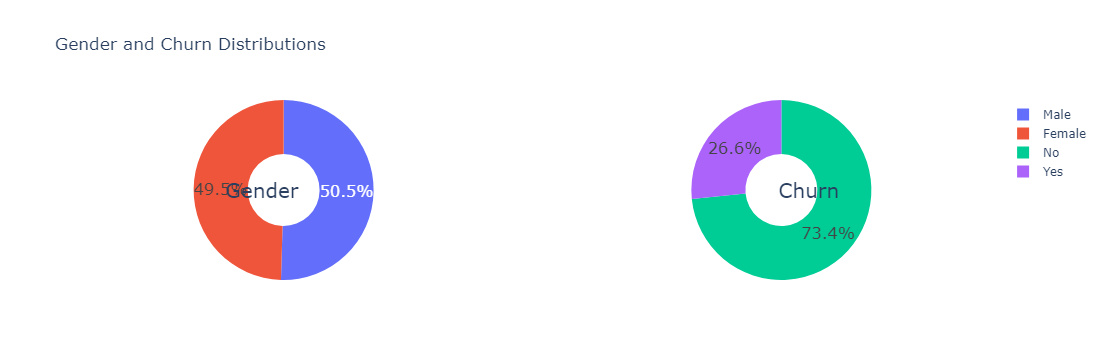

In [22]:
# Gender Distribution
# data visualization
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=customer_churn['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=customer_churn['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

Note:
* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [23]:
# grouping the results by the 'gender' column, and counting the occurrences
customer_churn["Churn"][customer_churn["Churn"]=="No"].groupby(by=customer_churn["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [24]:
# count of churned customers ("Yes") based on Gender. 
customer_churn["Churn"][customer_churn["Churn"]=="Yes"].groupby(by=customer_churn["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

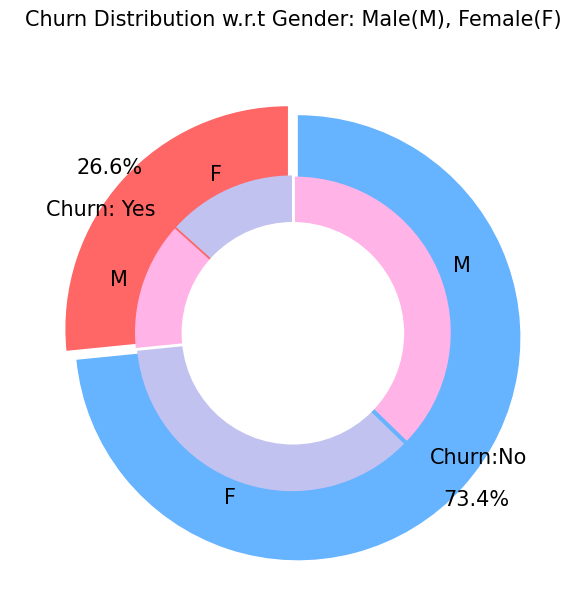

In [25]:
# data visualization
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. 
* Both genders behaved in similar fashion when it comes to migrating to another service provider/firm

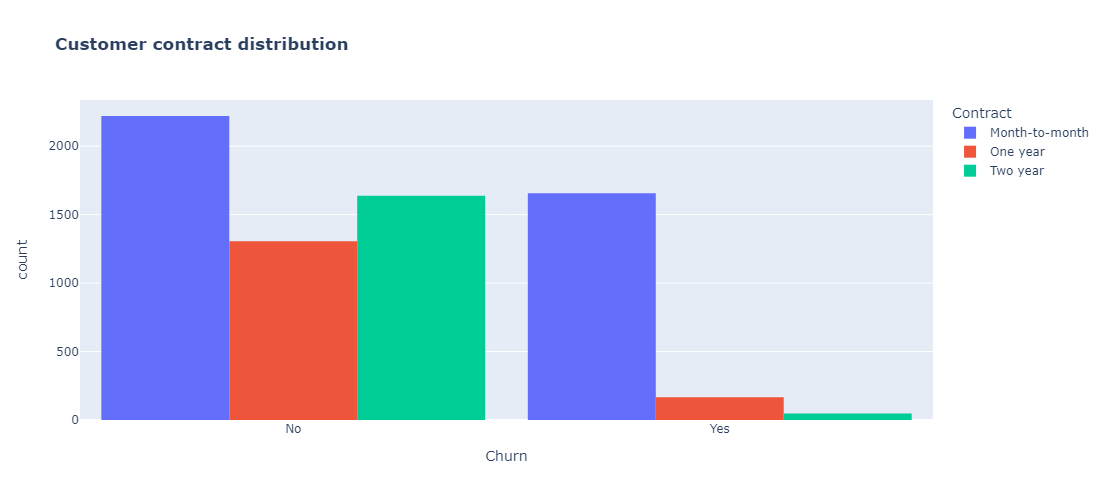

In [26]:
# histogram that visualizes the distribution of customer contracts for both churned and non-churned customers
fig = px.histogram(customer_churn, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

*About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract.

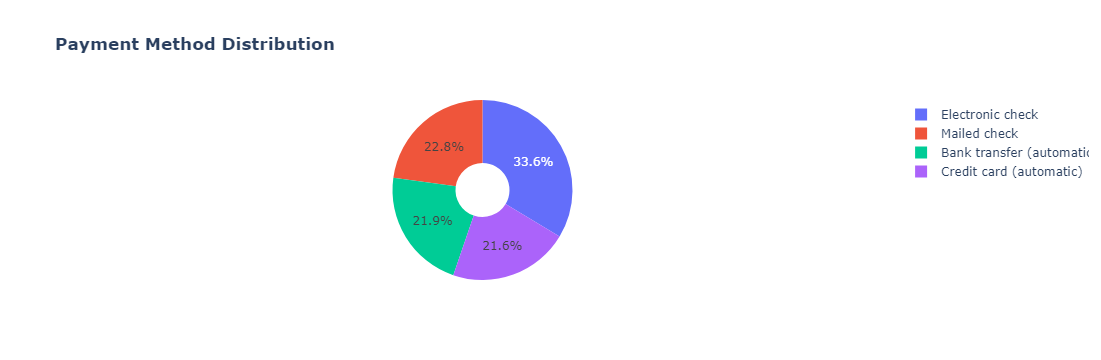

In [27]:
#  interactive pie chart showing the distribution of payment methods,
labels = customer_churn['PaymentMethod'].unique()
values = customer_churn['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

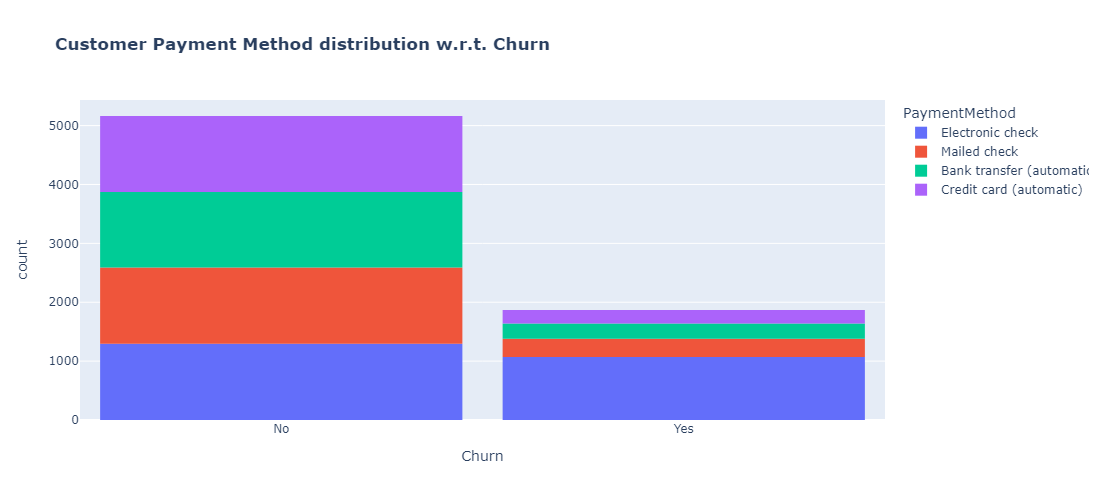

In [28]:
# distribution of customer churn based on different payment methods
fig = px.histogram(customer_churn, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [29]:
# Display the unique values in the "InternetService" column
customer_churn["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
# Display the unique values in the "Gender to Internet" column
customer_churn[customer_churn["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

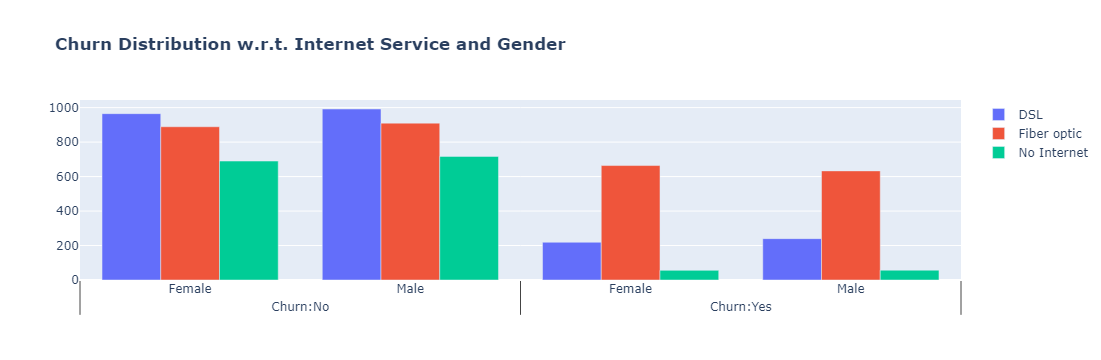

In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

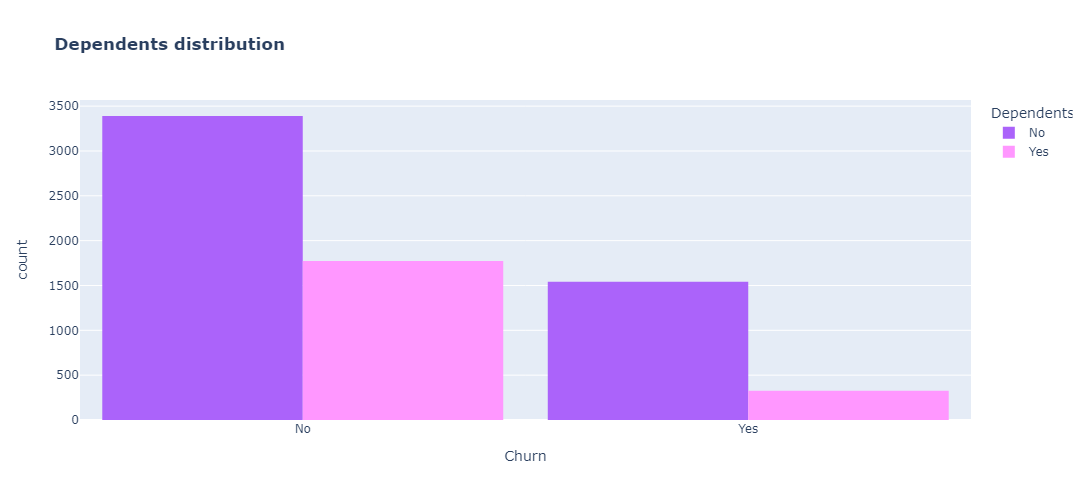

In [32]:
# distribution of customers with and without dependents
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(customer_churn, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn

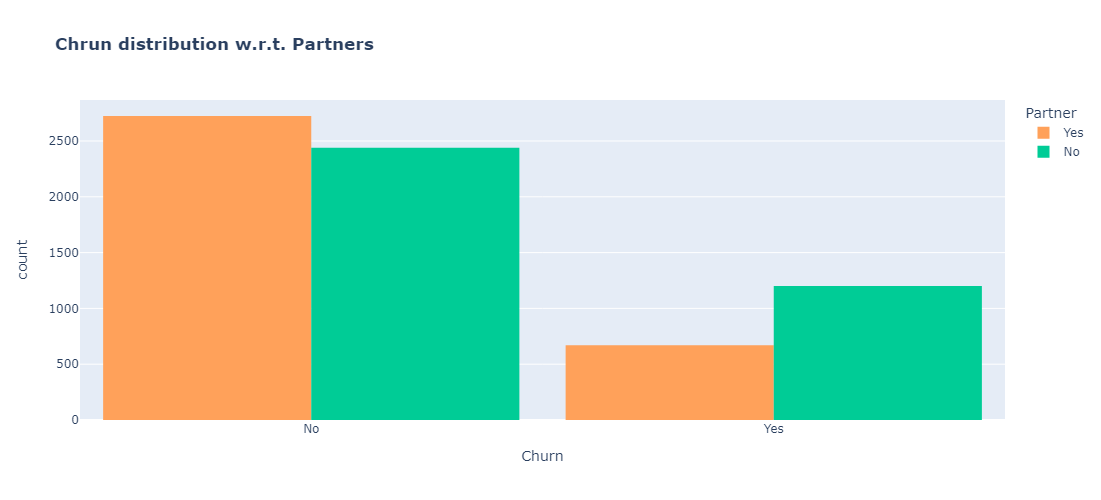

In [33]:
# distribution of customers with and without Partners
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(customer_churn, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

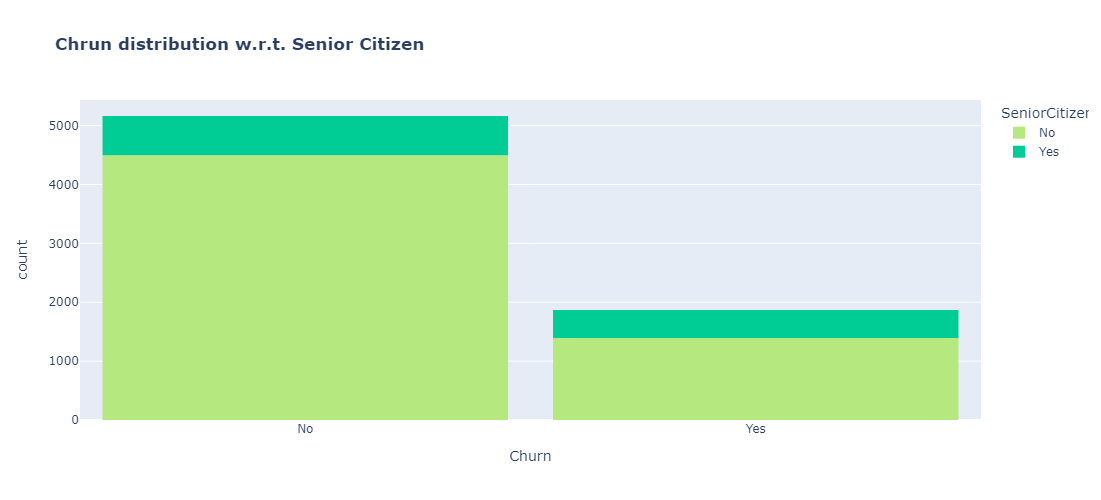

In [34]:
# distribution of customers with and without Citizen
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(customer_churn, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn

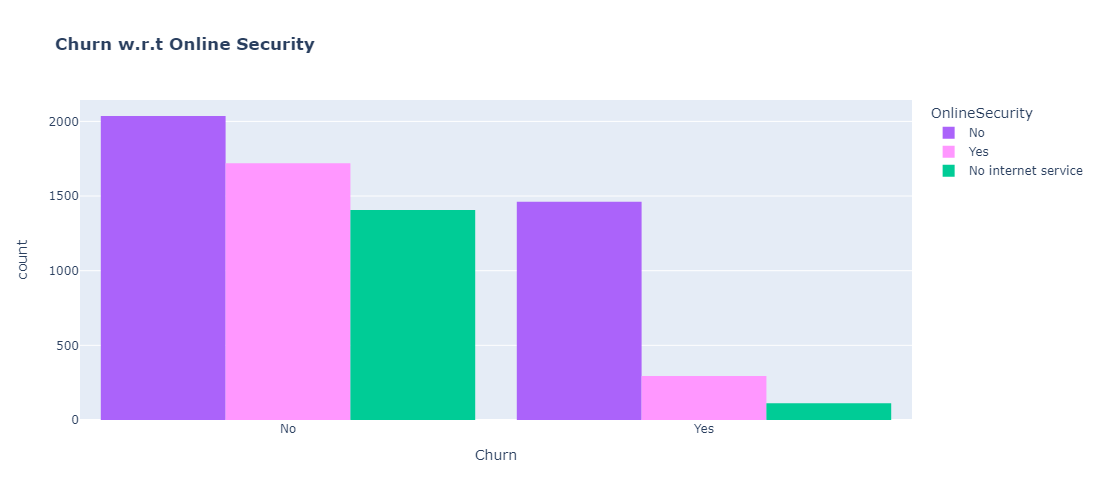

In [35]:
# distribution of customers with and without Security
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(customer_churn, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Most customers churn in the absence of online security

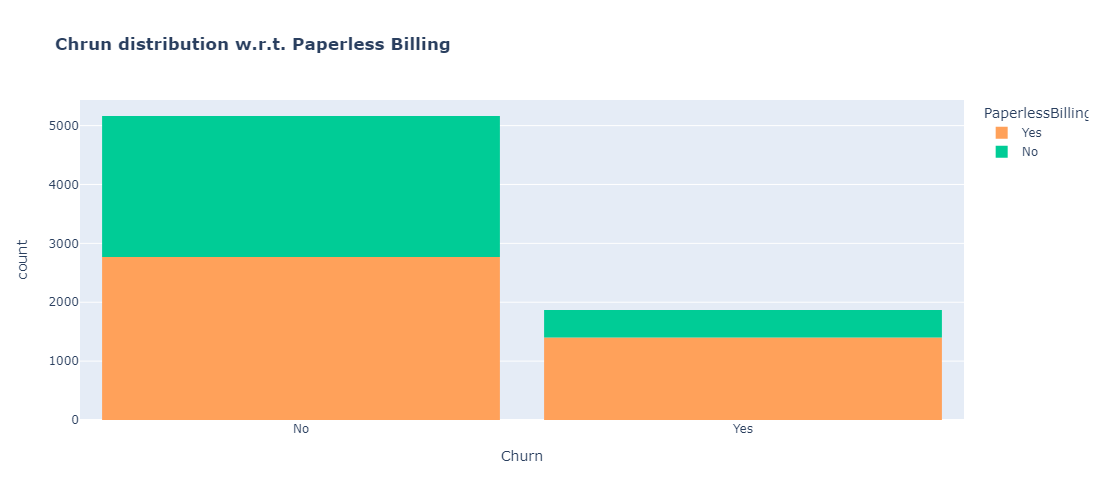

In [36]:
# distribution of customers with and without Paperless Billing
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(customer_churn, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with Paperless Billing are most likely to churn

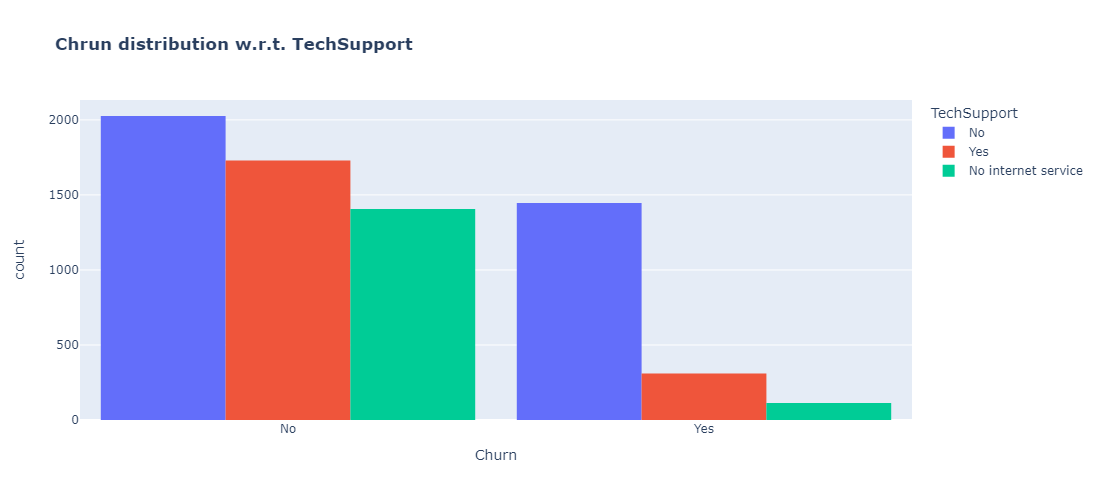

In [37]:
# distribution of customer churn with or without TechSupport 
fig = px.histogram(customer_churn, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with no TechSupport are most likely to migrate to another service provider

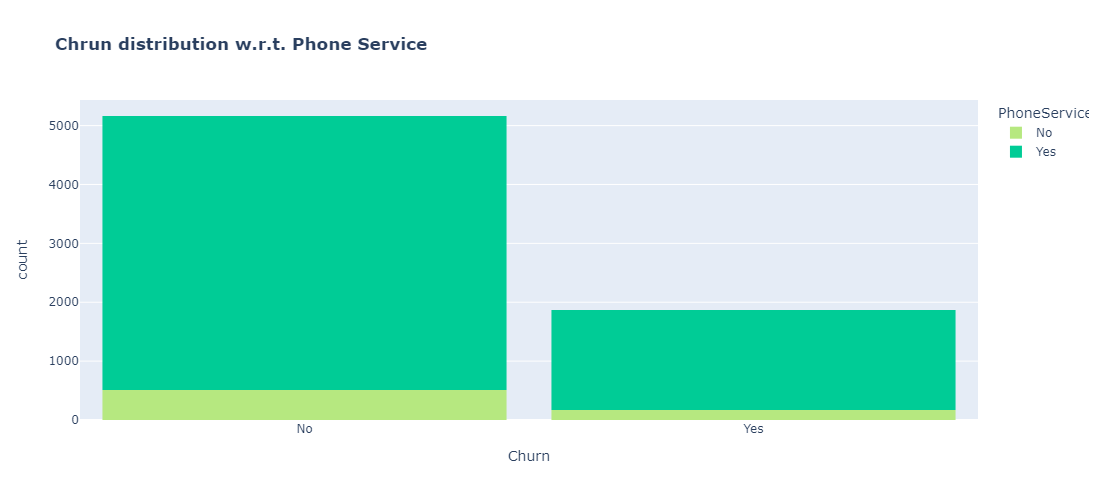

In [38]:
# distribution of customers with and without Phone Service
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(customer_churn, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

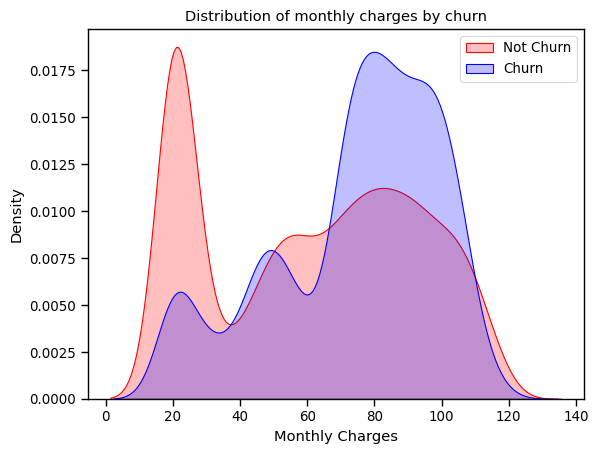

In [39]:
# distribution of customers with Monthly Charges
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(customer_churn.MonthlyCharges[(customer_churn["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(customer_churn.MonthlyCharges[(customer_churn["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

* Customers with higher Monthly Charges are also more likely to churn

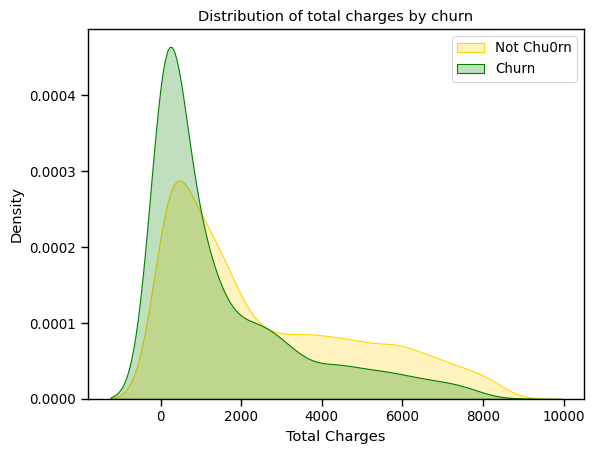

In [40]:
# distribution of total chages by churn
ax = sns.kdeplot(customer_churn.TotalCharges[(customer_churn["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(customer_churn.TotalCharges[(customer_churn["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

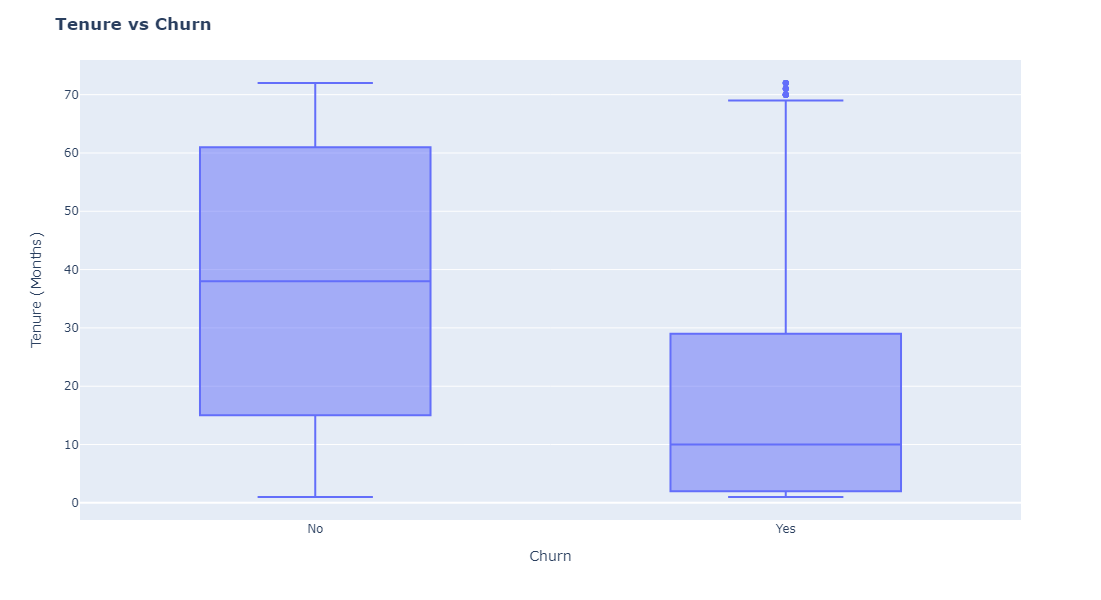

In [41]:
# Tenure Versus Churn
fig = px.box(customer_churn, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

* New customers are more likely to churn

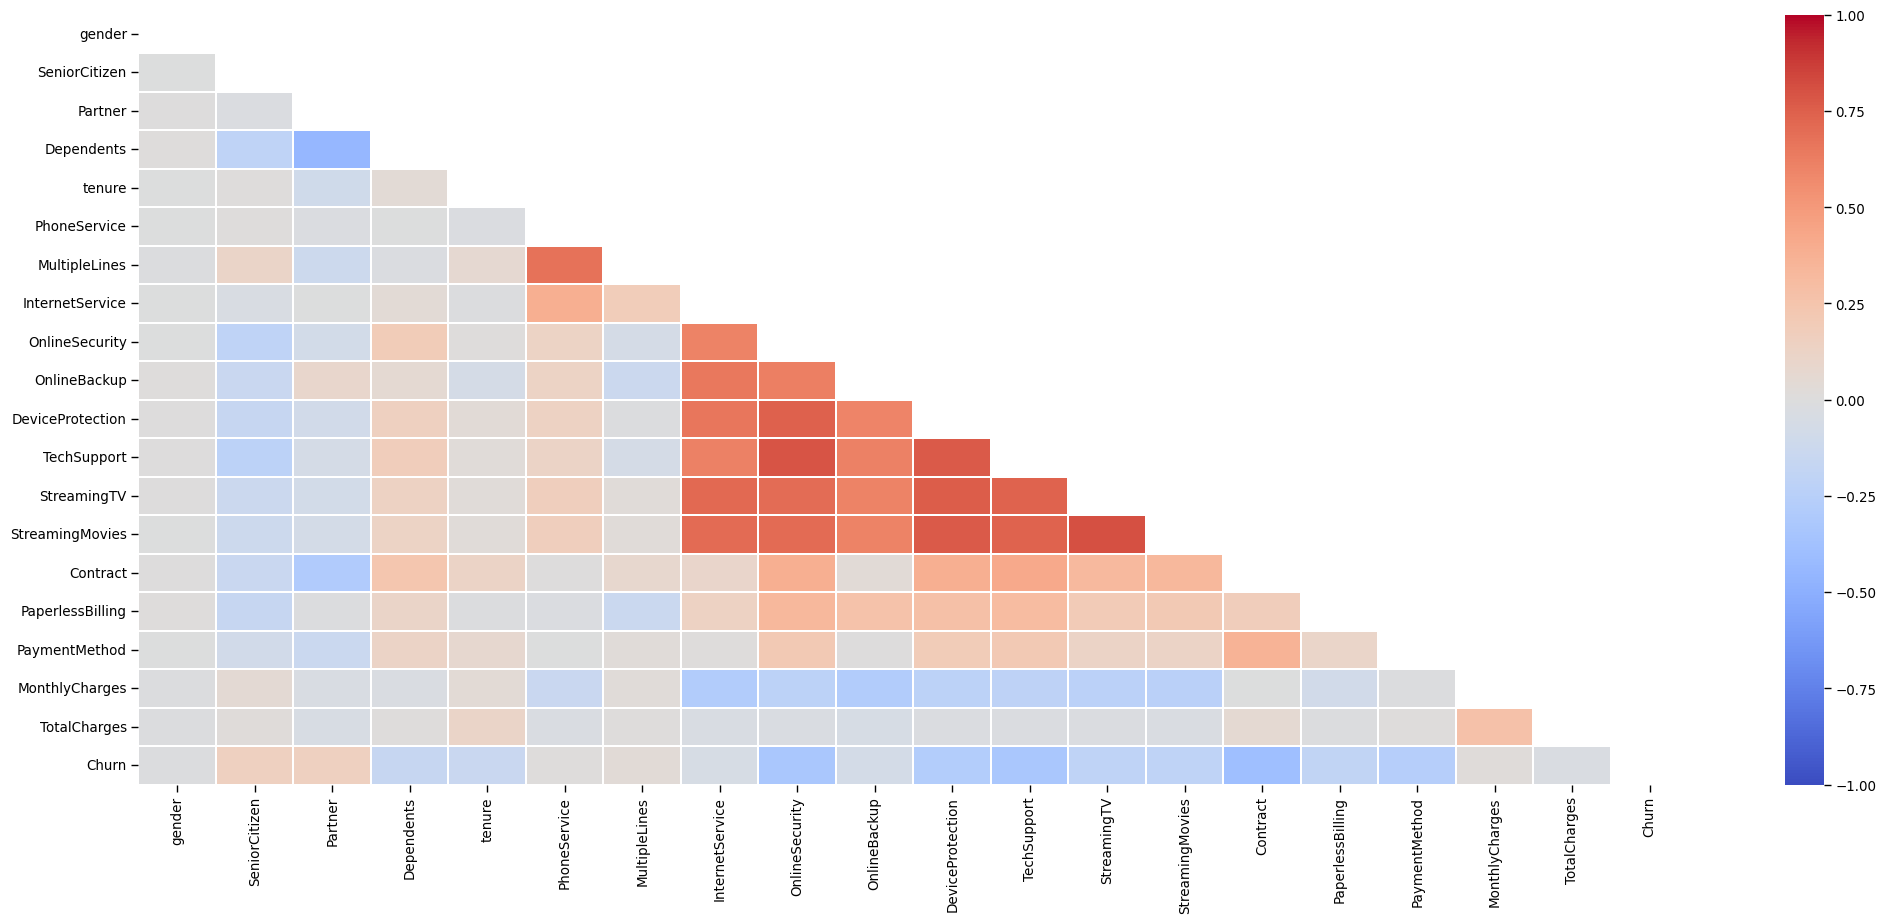

In [42]:
# correlation matrix 
plt.figure(figsize=(25, 10))

corr = customer_churn.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### Data Preprocessing

In [43]:
# data preprocessing (converting all object to ints)
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [44]:
customer_churn = customer_churn.apply(lambda x: object_to_int(x))
customer_churn.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [45]:
# checking for correlation with Target Variable
plt.figure(figsize=(14,7))
customer_churn.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

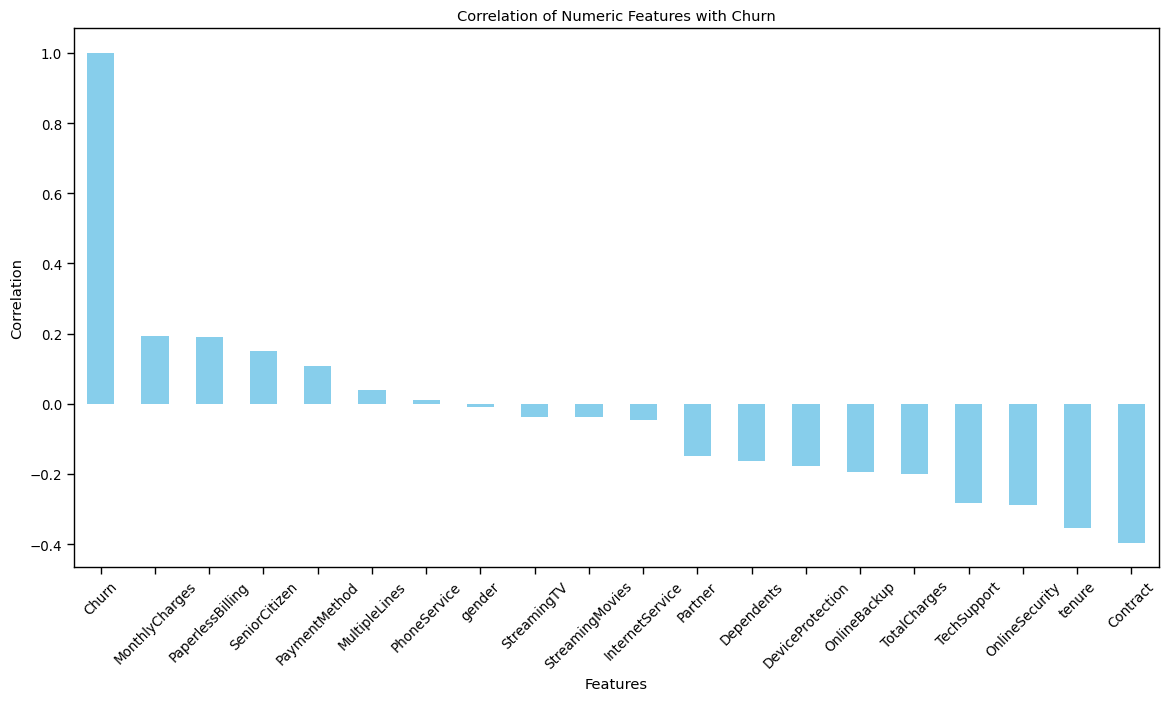

In [46]:
# Select numeric columns
numeric_columns = customer_churn.select_dtypes(include=['number'])

# Compute correlation
correlation_values = numeric_columns.corr()['Churn'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 7))
correlation_values.plot(kind='bar', color='skyblue')
plt.title('Correlation of Numeric Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# feature matrix and dropping target variable
X = customer_churn.drop(columns = ['Churn'])
y = customer_churn['Churn'].values

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, customer_churn)

In [ ]:
# standardise numerical attributes
customer_churn_std = pd.DataFrame(StandardScaler().fit_transform(customer_churn[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, customer_churn_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Print the Describtion of the training set to see the effect of standardization
print("Training Set after Standardization:")
X_train.describe()

In [ ]:
# Print dataset head of the training set to see the effect of standardization
X_train.head()

In [ ]:
def plot_distribution(original_data, scaled_data, feature):
    plt.figure(figsize=(10, 4))
    
    # Plot original data
    plt.subplot(1, 2, 1)
    sns.histplot(original_data[feature], kde=True, color='blue')
    plt.title('Original Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Plot scaled data
    plt.subplot(1, 2, 2)
    sns.histplot(scaled_data[feature], kde=True, color='orange')
    plt.title('Scaled Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot distribution for each numeric feature
for feat in num_cols:
    plot_distribution(customer_churn, customer_churn_std, feat) 

In [ ]:
# Checking count of target variable to check balancing
customer_churn.Churn.value_counts()


In [ ]:
churn_counts = customer_churn['Churn'].value_counts()

# Plot the count of 'Churn' values
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=customer_churn, palette=['red', 'blue'])
plt.title('Count of Churn Values')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [47]:
# feature matrix and dropping target variable
X = customer_churn.drop(columns = ['Churn'])
y = customer_churn['Churn'].values

In [48]:
smote_tomek = SMOTETomek(random_state=48)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

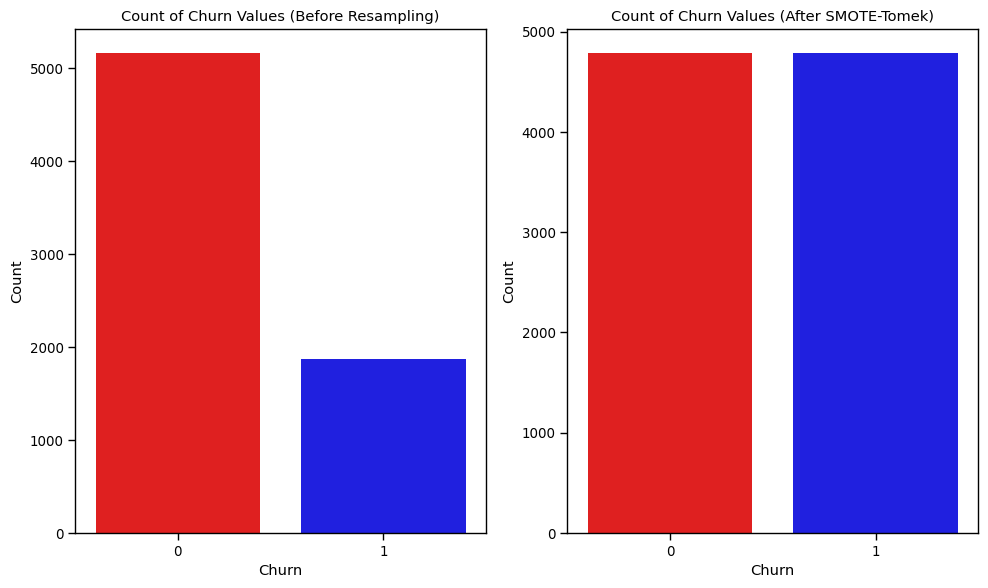

In [49]:
# Plot the count of 'Churn' values before and after resampling
plt.figure(figsize=(10, 6))

# Plot count of 'Churn' values before resampling
plt.subplot(1, 2, 1)
sns.countplot(x='Churn', data=customer_churn, palette=['red', 'blue'])
plt.title('Count of Churn Values (Before Resampling)')
plt.xlabel('Churn')
plt.ylabel('Count')

# Plot count of 'Churn' values after resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette=['red', 'blue'])
plt.title('Count of Churn Values (After SMOTE-Tomek)')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [50]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Printing the shapes of the split datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (7659, 19)
Testing data shape: (1915, 19)


In [51]:
# Combine resampled features and target variable into one DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='churn')], axis=1)

# Calculate correlation matrix
correlation_matrix = resampled_data.corr()

# Correlation of features with the target variable ('Churn')
correlation_with_target = correlation_matrix['churn'].drop('churn')  # Drop target variable itself

# Display correlation of features with the target variable
print("Correlation of Features with Target variable ('churn'):")
print(correlation_with_target)

Correlation of Features with Target variable ('churn'):
gender             -0.169871
SeniorCitizen       0.033856
Partner            -0.326380
Dependents         -0.320043
tenure             -0.449805
PhoneService       -0.003820
MultipleLines      -0.009372
InternetService    -0.081501
OnlineSecurity     -0.421054
OnlineBackup       -0.299440
DeviceProtection   -0.285560
TechSupport        -0.422749
StreamingTV        -0.103362
StreamingMovies    -0.103647
Contract           -0.543733
PaperlessBilling    0.138832
PaymentMethod       0.061433
MonthlyCharges      0.252538
TotalCharges       -0.257962
Name: churn, dtype: float64


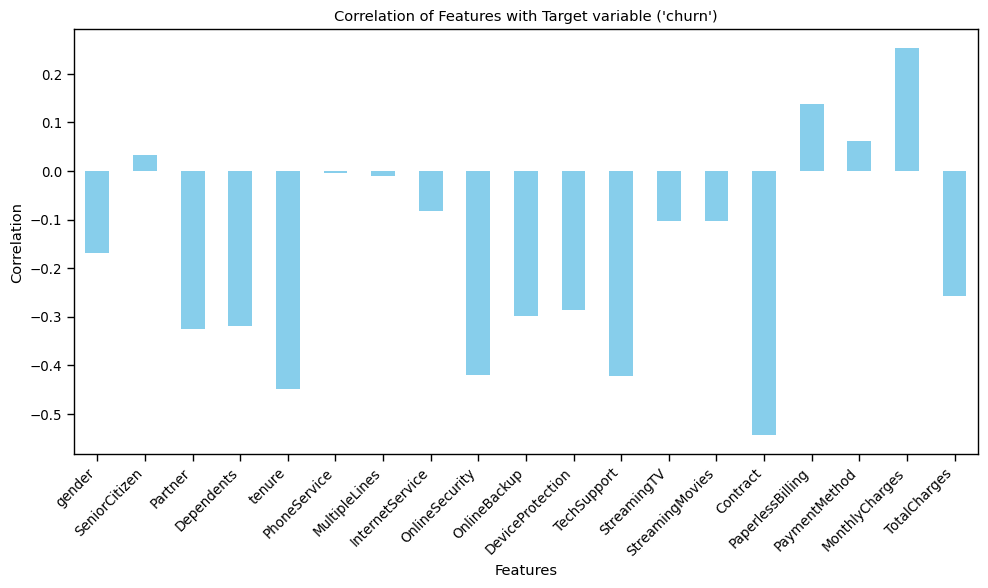

In [52]:
# Plot correlation of features with the target variable
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target variable ('churn')")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Dropping irrelevant Columns

In [53]:
# Assuming X_resampled is your resampled feature matrix
X_resampled_feature_selected = X_resampled.drop(columns=[  'SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_feature_selected, y_resampled, test_size=0.2, random_state=42)

# Printing the shapes of the split datasets
print("Training data shape:", X_train_resampled.shape)
print("Testing data shape:", X_test_resampled.shape)


Training data shape: (7659, 9)
Testing data shape: (1915, 9)


### Feature Scaling
norm_features are those features which are not normally distributed. We will use Normalization to scale these features std_features are those features which are normally distributed. We will use Standardization to scale these features

In [54]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [55]:
# Fit and transform the training data
X_train_resampled_scaled = X_train_resampled.copy()
X_train_resampled_scaled = minmax_scaler.fit_transform(X_train_resampled_scaled)
X_train_resampled_scaled = std_scaler.fit_transform(X_train_resampled_scaled)



In [56]:
# Transform the testing data using the fitted scalers from the training data
X_test_resampled_scaled = X_test_resampled.copy()
X_test_resampled_scaled = minmax_scaler.transform(X_test_resampled_scaled)
X_test_resampled_scaled = std_scaler.transform(X_test_resampled_scaled)

In [62]:
# Print dataset head of the training set to see the effect of standardization
print(X_train_resampled_scaled[:5])

[[-0.86016915  1.29717462  1.90761806  1.81163086  1.70283163  1.46668348
   1.44071147  1.69854773  1.94543839]
 [-0.86016915 -0.77090623 -0.52421395  0.15237966  1.70283163 -0.8833853
   1.44071147  1.69854773 -0.64408414]
 [-0.86016915  1.29717462 -0.52421395 -0.71872722  0.46662429  0.29164909
   0.27205979  0.46357744  0.65067712]
 [-0.86016915 -0.77090623 -0.52421395 -0.84317106  1.70283163 -0.8833853
  -0.89659188 -0.77139285 -0.64408414]
 [-0.86016915  1.29717462 -0.52421395  0.02793582 -0.76958306  0.29164909
  -0.89659188 -0.77139285 -0.64408414]]


### Modelling
To address the employee attrition problem, we have carefully selected a diverse set of classifiers, each offering unique capabilities to capture different aspects of the data. These classifiers include ensemble methods like RandomForestClassifier and XGBClassifier, which excel at handling non-linearity and complex relationships in the data. Additionally, we've incorporated MLPClassifier, leveraging neural networks to capture intricate patterns within the data.

Moreover, GaussianProcessClassifier has been included for its ability to provide probabilistic modeling with uncertainty estimation, ensuring reliable predictions. DecisionTreeClassifier, a simple yet interpretable model, allows for easy feature analysis. KNNClassifier has been chosen for its simplicity and effectiveness in dealing with data points in proximi.


SVC (Support Vector Classifier) is utilized for its capability to find optimal hyperplanes for class separation in high-dimensional spaces. LGBMClassifier stands out for its efficiency in handling large datasets and imbalanced classes, while AdaBoostClassifier iteratively improves performance by giving more emphasis to misclassified samp
s.

Furthermore, NaiveBayes and LogisticRegression have been included to provide additional diversity in modeling approaches. These classifiers will be evaluated using various metrics such as accuracy, precision, recall, and F1-score to gauge overall classification perfor
nce.

Additionally, the ROC curve and Area Under the Curve (AUC) will be utilized to understand the trade-off between true positive and false positive rates. Confusion matrices will provide insights into true negative, false positive, false negative, and true positive rates, aiding in model comparison and selection. We'll also experiment with both scaled and unscaled data, as scaling may impact the performance of certain algorithms.orithms.

In [63]:
# Define the classifiers to evaluate
classifiers = [
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    MLPClassifier(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000),
    AdaBoostClassifier(random_state=48),
    KNeighborsClassifier(),
    SVC(random_state=42, probability=True),
    GaussianNB(),
    LogisticRegression(random_state=42)  # Add Logistic Regression classifier
]

# Define the classifier names
classifier_names = [
    'RandomForest',
    'XGBoost',
    'MLPClassifier',
    'GaussianProcess',
    'DecisionTree',
    'LGBMClassifier',
    'AdaBoostClassifier',
    'KNN',
    'SVC',
    'NaiveBayes',
    'LogisticRegression'  
]




# Define an empty dictionary to store the results
results_dict = {}

# Define the function to calculate additional metrics
def calculate_metrics(y_true, y_pred, cm):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Calculate additional metrics
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tnr = tn / (tn + fp)
    fnr = fn / (fn + tp)

    return accuracy, precision, recall, f1, tpr, fpr, tnr, fnr


def model(name, classifier, x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled):
    classifier.fit(x_train_resampled, y_train_resampled)
    prediction = classifier.predict(x_test_resampled)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val_auc = cross_val_score(classifier, x_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test_resampled, prediction)

    plot_roc_curve(classifier, x_test_resampled, y_test_resampled)
    plot_confusion_matrix(classifier, x_test_resampled, y_test_resampled)
    plot_feature_importance(classifier, x_train_resampled)  # Add this line to plot feature importance

    print("\nClassification Report:\n")
    print(classification_report(y_test_resampled, prediction))

    cm = confusion_matrix(y_test_resampled, prediction)
    tn, fp, fn, tp = cm.ravel()
    tp_rate = round((tp / (tp + fn))*100,2)
    fp_rate = round((fp / (fp + tn))*100,2)
    tn_rate = round((tn / (tn + fp))*100,2)
    fn_rate = round((fn / (fn + tp))*100,2)

    result_list = calculate_metrics(y_test_resampled, prediction, cm)

    # Add the metrics to the results_dict
    results_dict[name] = list(result_list) + [tp_rate, fp_rate, tn_rate, fn_rate]

    return result_list


# Define the function to plot ROC curve
def plot_roc_curve(model, X_test_resampled, y_test_resampled):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test_resampled)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


# Define the function to plot confusion matrix
def plot_confusion_matrix(model, X_test_resampled, y_test_resampled):
    cm = confusion_matrix(y_test_resampled, model.predict(X_test_resampled))
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'], rotation=45)
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    

# Define the function to plot feature importance
def plot_feature_importance(classifier, x_train_resampled):
    if hasattr(classifier, 'feature_importances_'):
        if isinstance(x_train_resampled, pd.Index):
            x_train_resampled = x_train_resampled.to_frame()
        if isinstance(x_train_resampled, pd.DataFrame):
            feature_importances = classifier.feature_importances_
            features = x_train_resampled.columns

            sorted_idx = np.argsort(feature_importances)[::-1]

            plt.figure(figsize=(10, 6))
            plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
            plt.xticks(range(len(feature_importances)), np.array(features)[sorted_idx], rotation=90)
            plt.xlabel('Feature')
            plt.ylabel('Importance')
            plt.title('Feature Importance')
            plt.show()
        else:
            print("x_train_resampled is not a DataFrame.")
    else:
        print("Classifier does not have feature importances.")

### Decision Tree Classifier

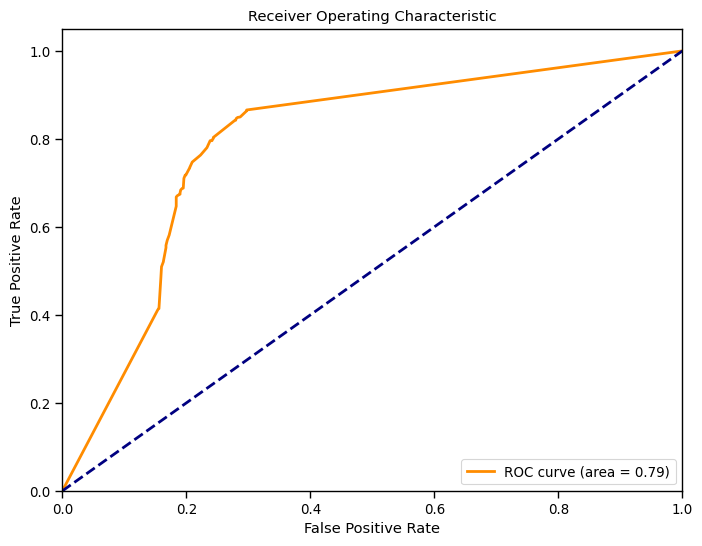

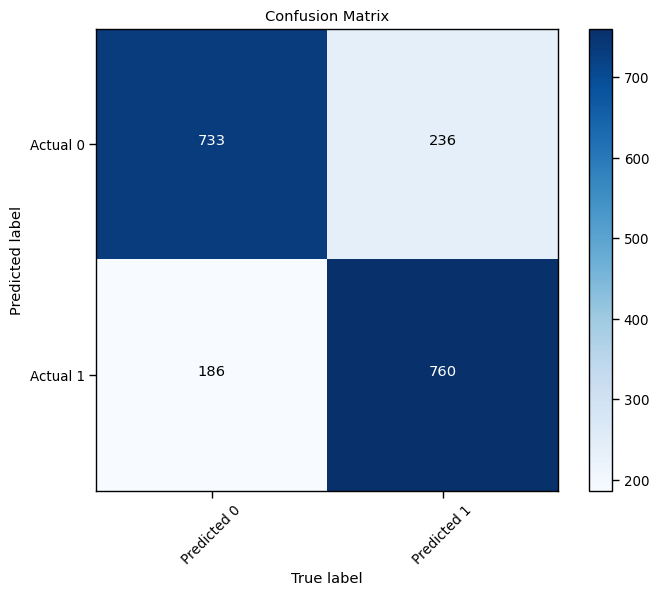

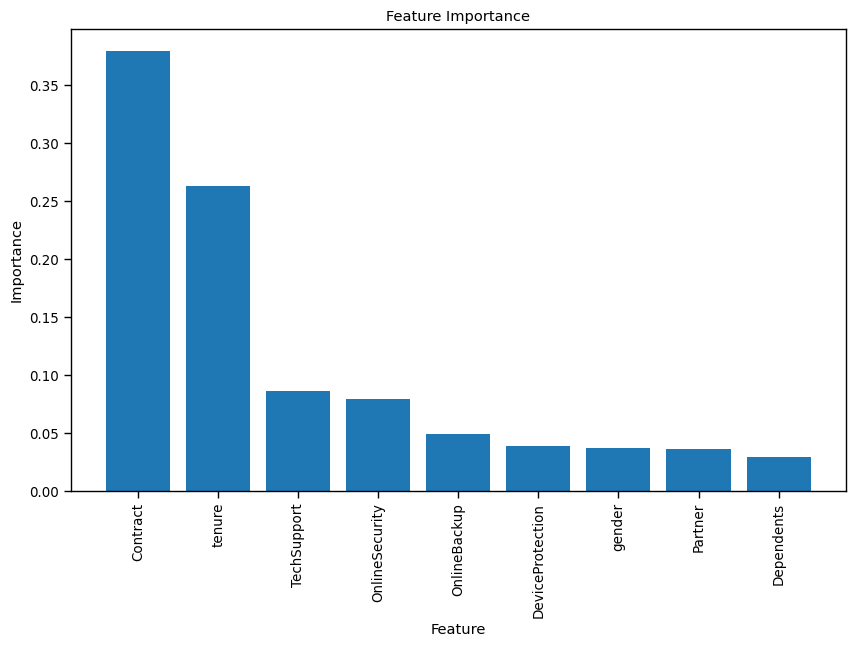


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       969
           1       0.76      0.80      0.78       946

    accuracy                           0.78      1915
   macro avg       0.78      0.78      0.78      1915
weighted avg       0.78      0.78      0.78      1915



In [64]:
classifier_results = model('DecisionTree', DecisionTreeClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['DecisionTree'] = classifier_results


### Random Forest Classifier

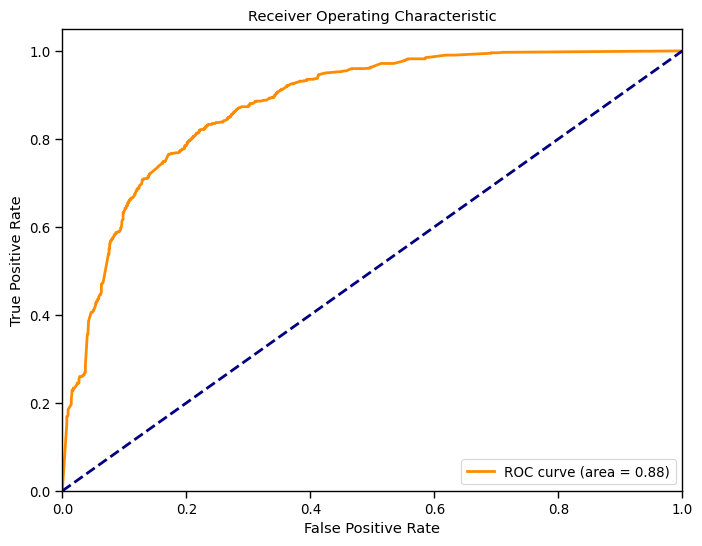

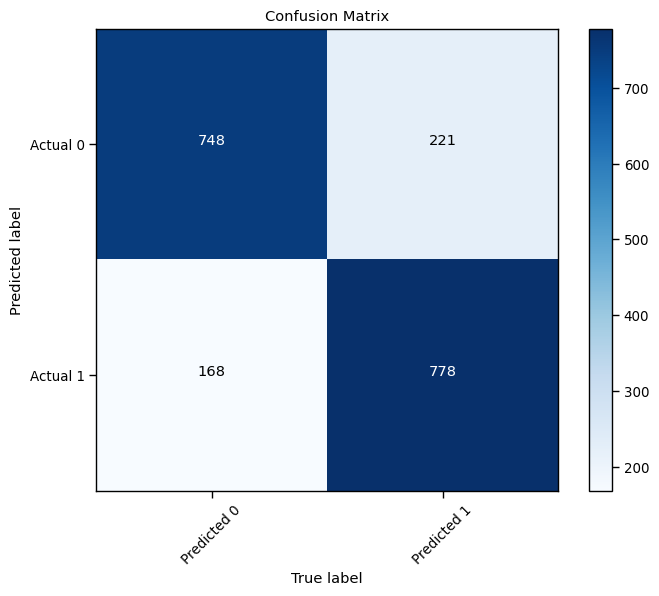

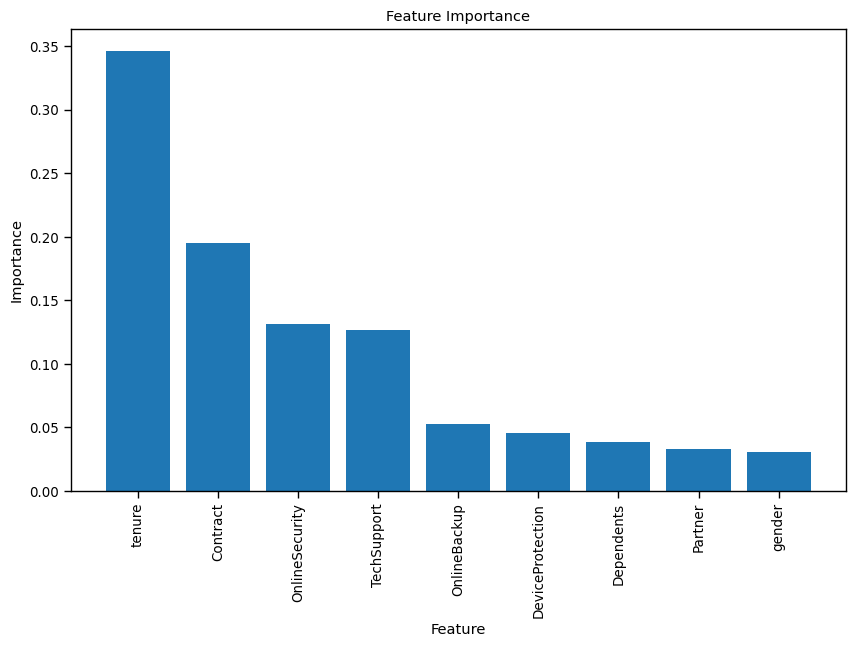


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       969
           1       0.78      0.82      0.80       946

    accuracy                           0.80      1915
   macro avg       0.80      0.80      0.80      1915
weighted avg       0.80      0.80      0.80      1915



In [65]:
classifier_results = model('RandomForest',RandomForestClassifier(random_state=42),  X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['RandomForest'] = classifier_results

### XGBoost Classifier

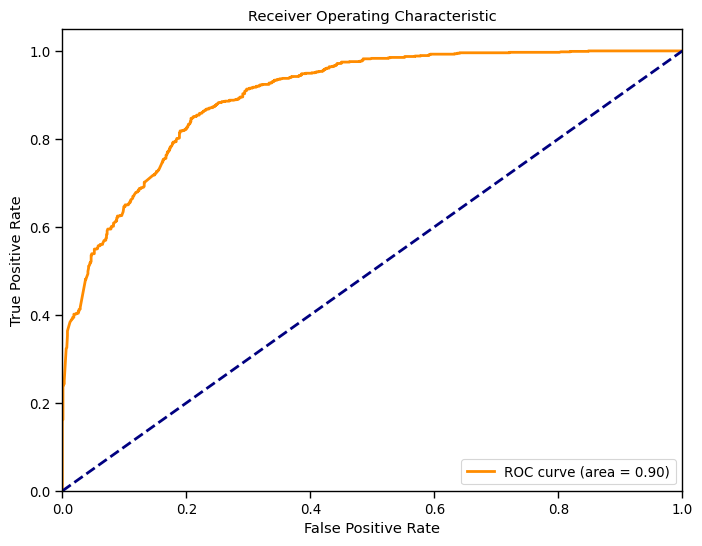

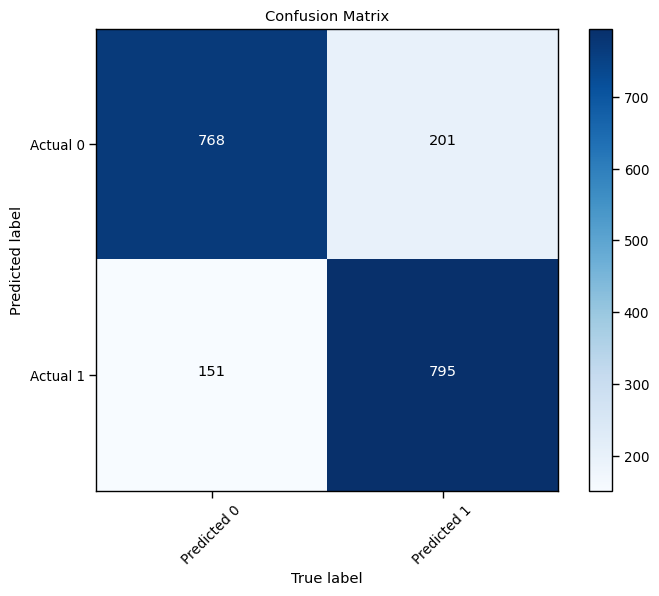

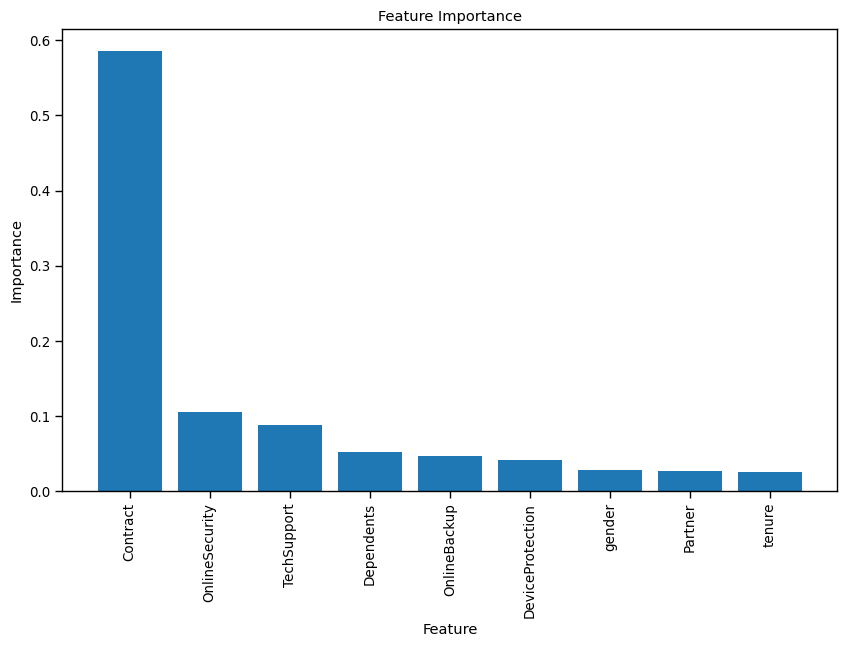


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       969
           1       0.80      0.84      0.82       946

    accuracy                           0.82      1915
   macro avg       0.82      0.82      0.82      1915
weighted avg       0.82      0.82      0.82      1915



In [66]:
classifier_results = model('XGBoost',XGBClassifier(random_state=42),  X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['XGBoost'] = classifier_results

In [67]:
# classifier_results = model('GaussianProcess', GaussianProcessClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
# results_dict['GaussianProcess'] = classifier_results

### MLP Classifier

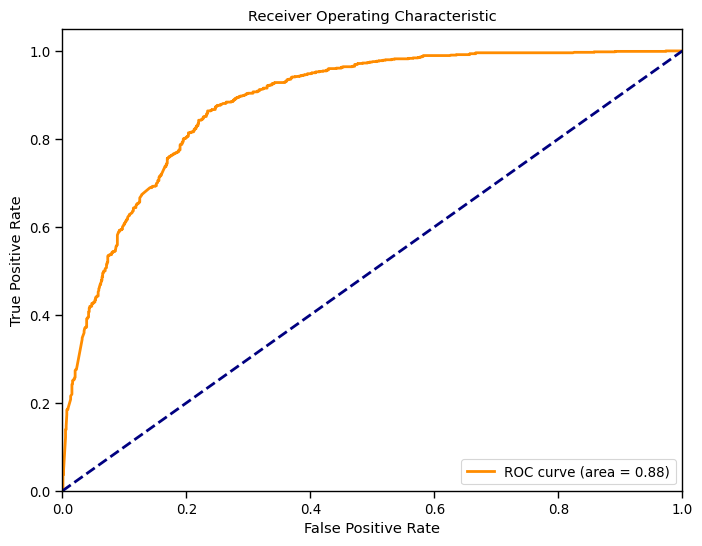

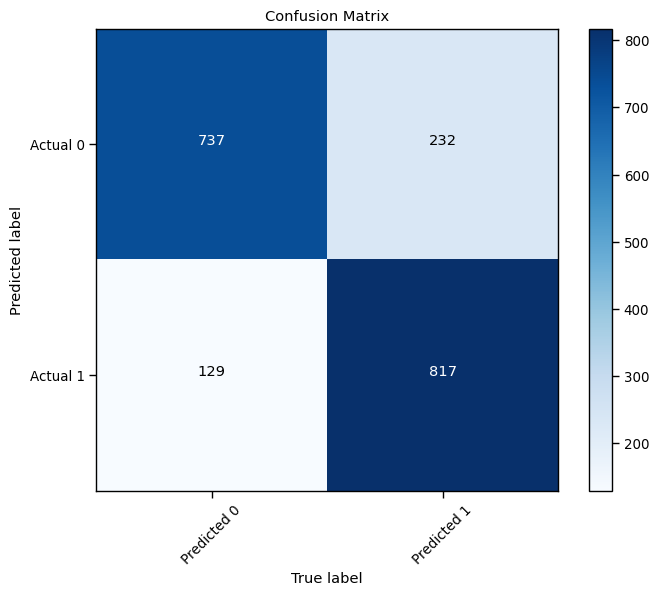

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       969
           1       0.78      0.86      0.82       946

    accuracy                           0.81      1915
   macro avg       0.81      0.81      0.81      1915
weighted avg       0.82      0.81      0.81      1915



In [68]:
# Fit and evaluate the MLPClassifier model using resampled data
classifier_results = model('MLPClassifier', MLPClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['MLPClassifier'] = classifier_results


### LGBM Classifier

[LightGBM] [Info] Number of positive: 3841, number of negative: 3818
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 7659, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501502 -> initscore=0.006006
[LightGBM] [Info] Start training from score 0.006006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


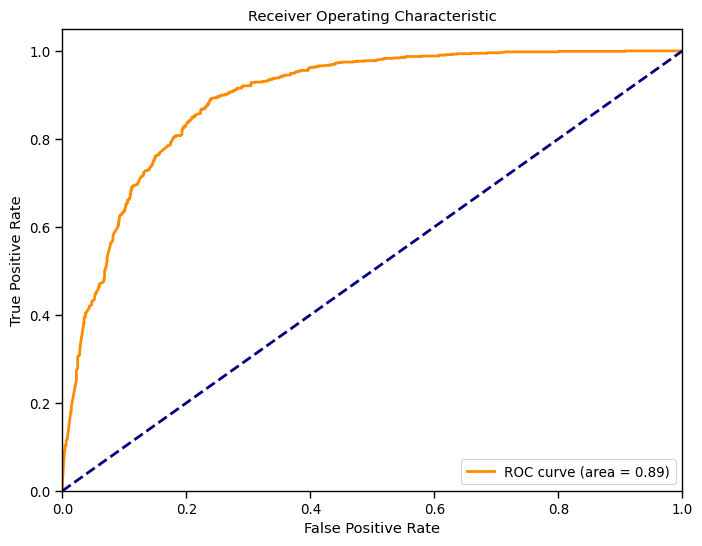

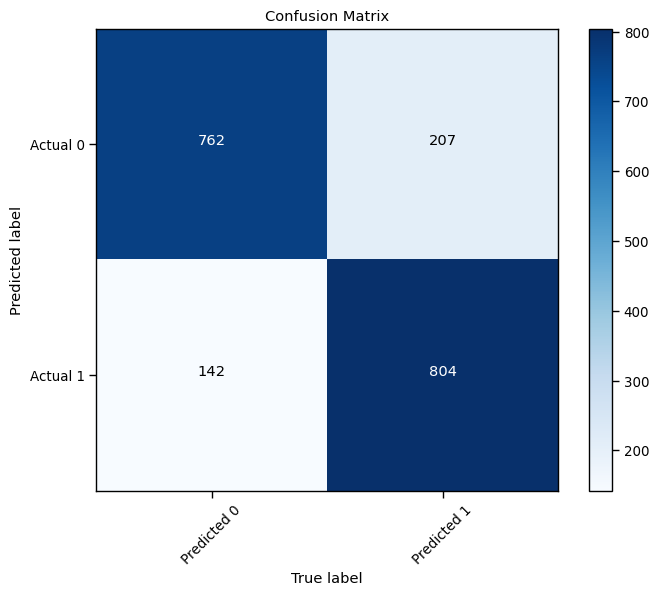

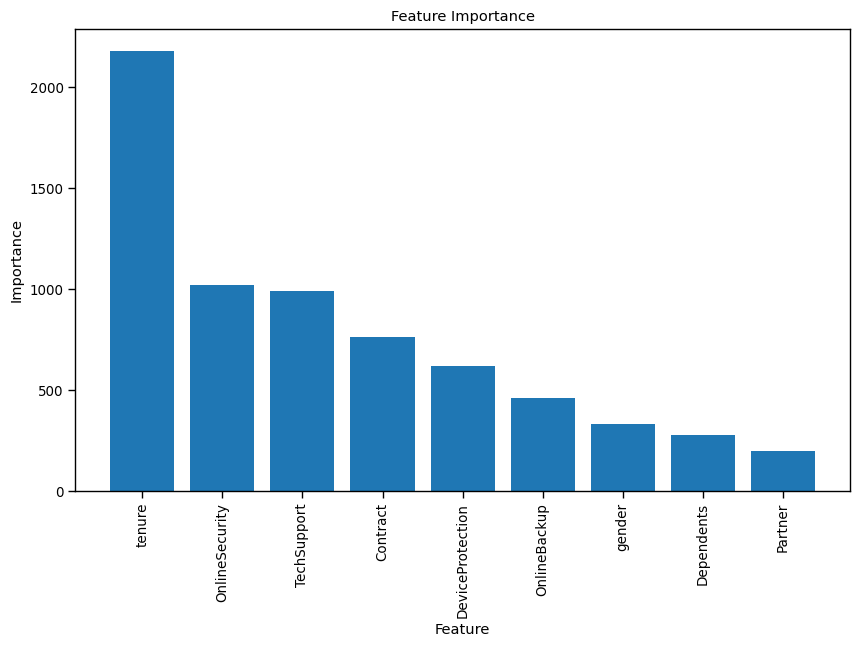


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       969
           1       0.80      0.85      0.82       946

    accuracy                           0.82      1915
   macro avg       0.82      0.82      0.82      1915
weighted avg       0.82      0.82      0.82      1915



In [69]:
classifier_results = model('LGBMClassifier', LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['LGBMClassifier'] = classifier_results

###  KNeighbors Classifier

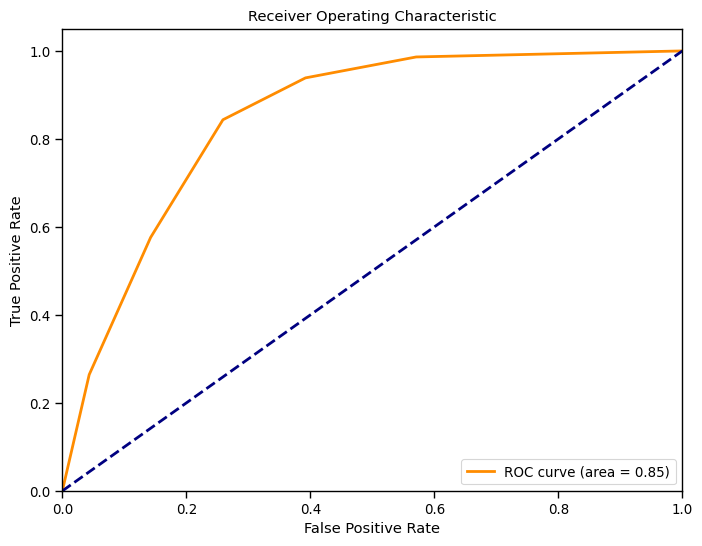

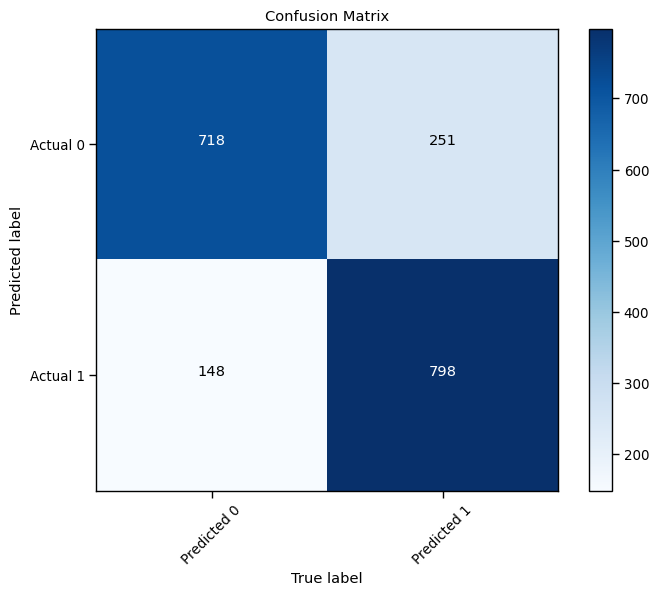

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       969
           1       0.76      0.84      0.80       946

    accuracy                           0.79      1915
   macro avg       0.79      0.79      0.79      1915
weighted avg       0.80      0.79      0.79      1915



In [70]:
classifier_results = model('KNN', KNeighborsClassifier(), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['KNN'] = classifier_results

### Support Vector Classifier (SVC) 

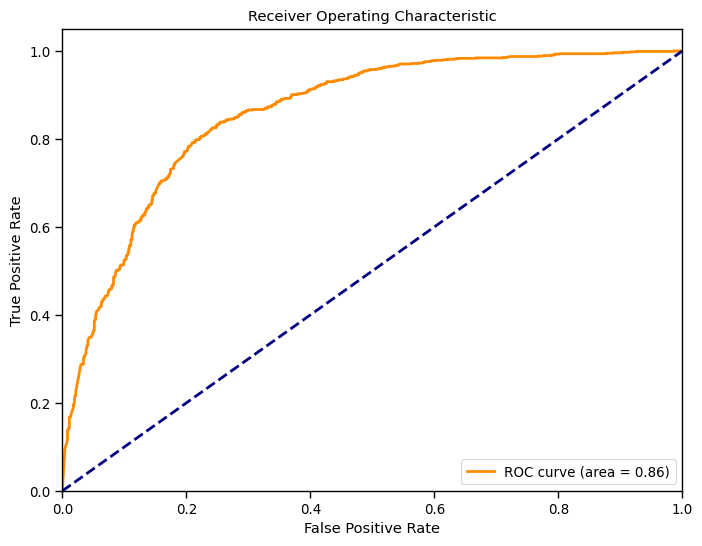

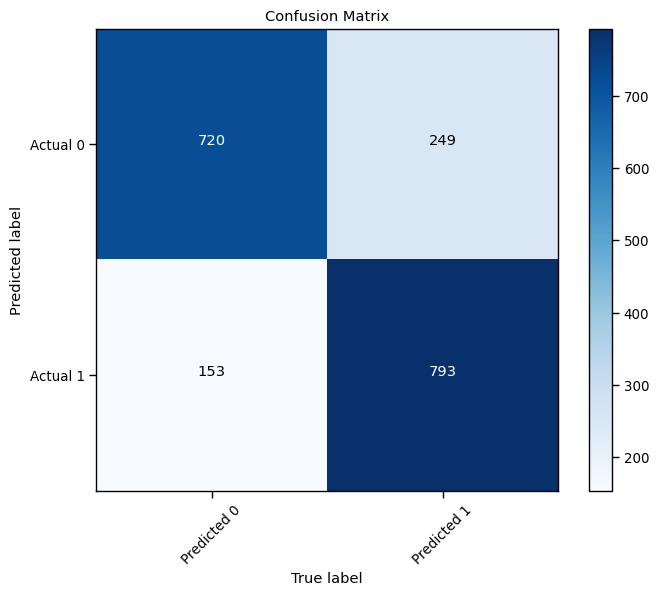

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       969
           1       0.76      0.84      0.80       946

    accuracy                           0.79      1915
   macro avg       0.79      0.79      0.79      1915
weighted avg       0.79      0.79      0.79      1915



In [71]:
classifier_results = model('SVC', SVC(probability=True), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['SVC'] = classifier_results

### AdaBoost Classifier

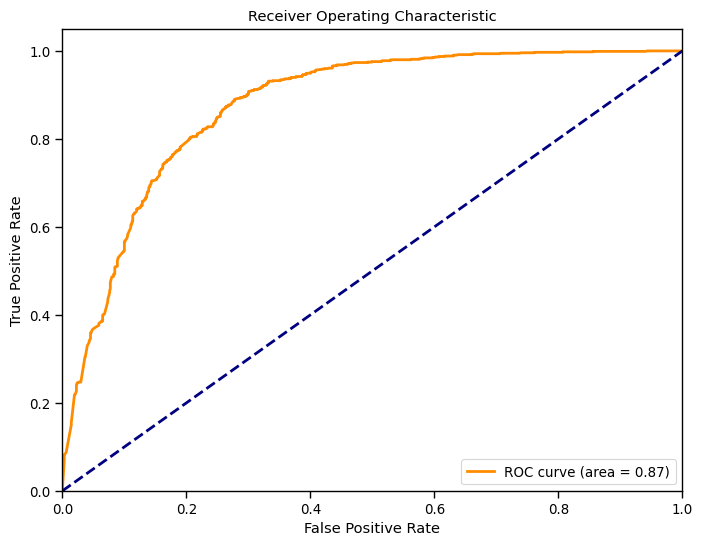

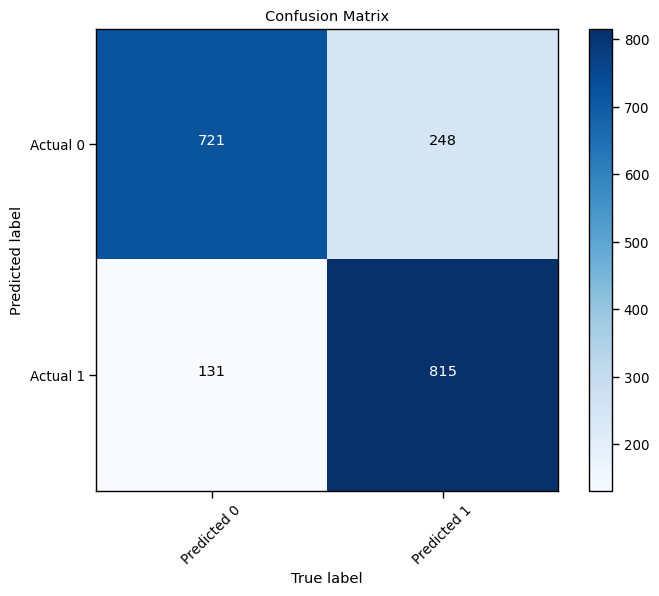

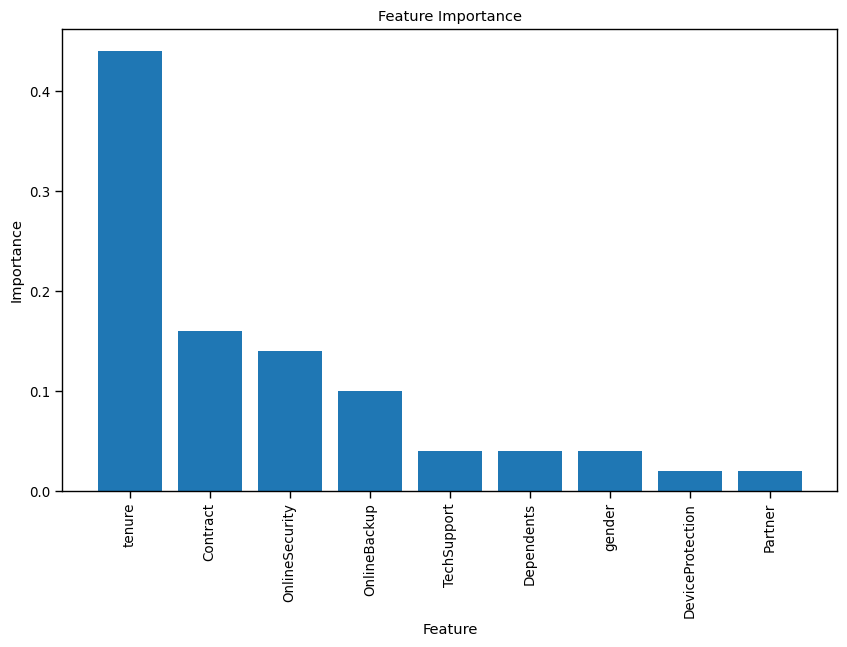


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       969
           1       0.77      0.86      0.81       946

    accuracy                           0.80      1915
   macro avg       0.81      0.80      0.80      1915
weighted avg       0.81      0.80      0.80      1915



In [72]:
classifier_results = model('AdaBoostClassifier', AdaBoostClassifier(random_state=48), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['AdaBoostClassifier'] = classifier_results


### NaiveBayes

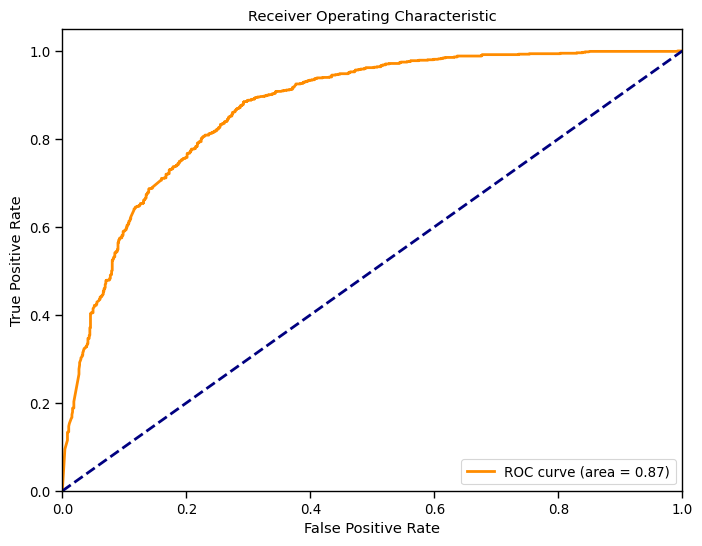

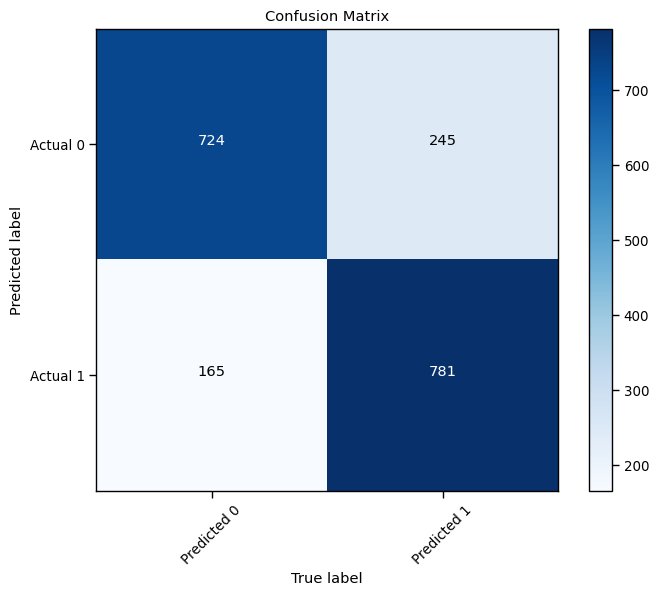

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       969
           1       0.76      0.83      0.79       946

    accuracy                           0.79      1915
   macro avg       0.79      0.79      0.79      1915
weighted avg       0.79      0.79      0.79      1915



In [73]:
classifier_results = model('NaiveBayes', GaussianNB(), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['NaiveBayes'] = classifier_results


### Logistic Regression

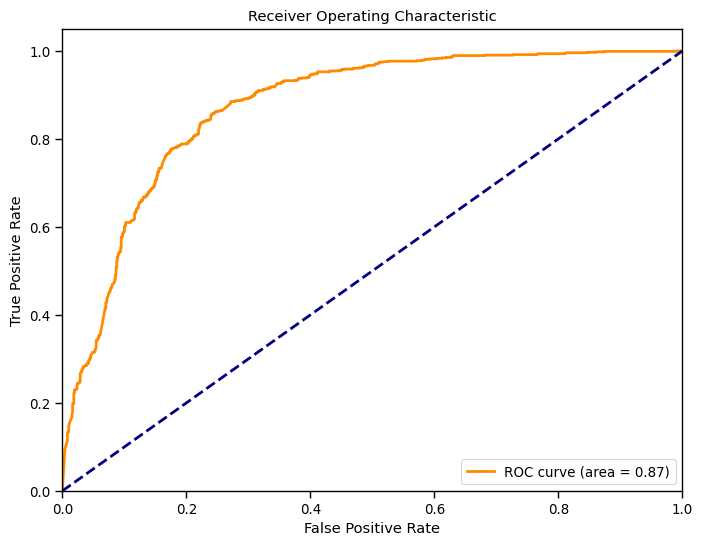

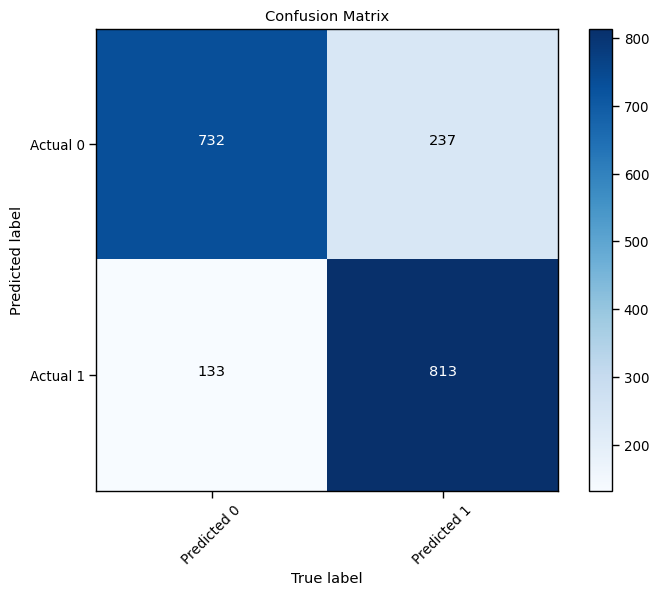

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       969
           1       0.77      0.86      0.81       946

    accuracy                           0.81      1915
   macro avg       0.81      0.81      0.81      1915
weighted avg       0.81      0.81      0.81      1915



In [74]:
classifier_results = model('LogisticRegression', LogisticRegression(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
results_dict['LogisticRegression'] = classifier_results


### Tabulated Results for Algorithm Comparison with Metrics

In [75]:
for key,val in results_dict.items():
    results_dict[key] = [round(i*100,2) for i in val]

results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
results_df = results_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
results_df


Accuracy  Precision  Recall  F1-Score    TP%    FP%  \
LGBMClassifier         81.78      79.53   84.99     82.17  84.99  21.36   
XGBoost                81.62      79.82   84.04     81.87  84.04  20.74   
MLPClassifier          81.15      77.88   86.36     81.90  86.36  23.94   
LogisticRegression     80.68      77.43   85.94     81.46  85.94  24.46   
AdaBoostClassifier     80.21      76.67   86.15     81.13  86.15  25.59   
RandomForest           79.69      77.88   82.24     80.00  82.24  22.81   
KNN                    79.16      76.07   84.36     80.00  84.36  25.90   
SVC                    79.01      76.10   83.83     79.78  83.83  25.70   
NaiveBayes             78.59      76.12   82.56     79.21  82.56  25.28   
DecisionTree           77.96      76.31   80.34     78.27  80.34  24.36   

                      TN%    FN%  
LGBMClassifier      78.64  15.01  
XGBoost             79.26  15.96  
MLPClassifier       76.06  13.64  
LogisticRegression  75.54  14.06  
AdaBoostClassifier  74.41  13.85  
RandomForest        77.19  17.76  
KNN                 74.10  15.64  
SVC                 74.30  16.17  
NaiveBayes          74.72  17.44  
DecisionTree        75.64  19.66

In [ ]:
visuals showing  Results for Algorithm Comparison with Metrics

<Figure size 1000x600 with 0 Axes>

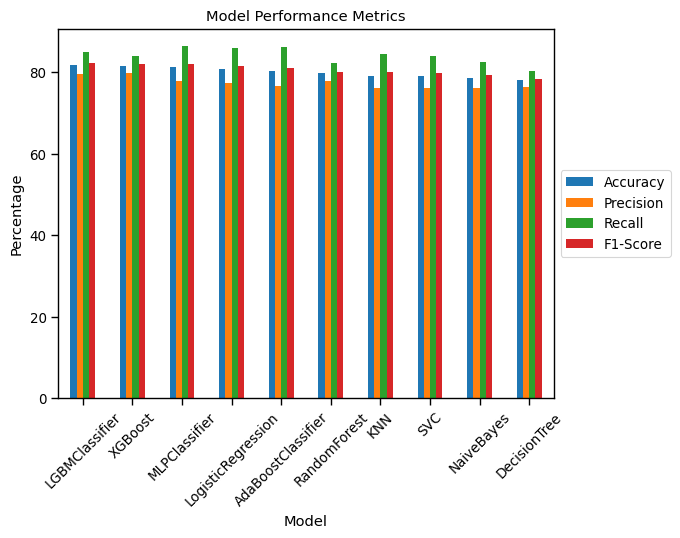

In [88]:
# Sort results_df by Accuracy, F1-Score, Precision, and Recall in descending order
results_df = results_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', stacked=False)
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


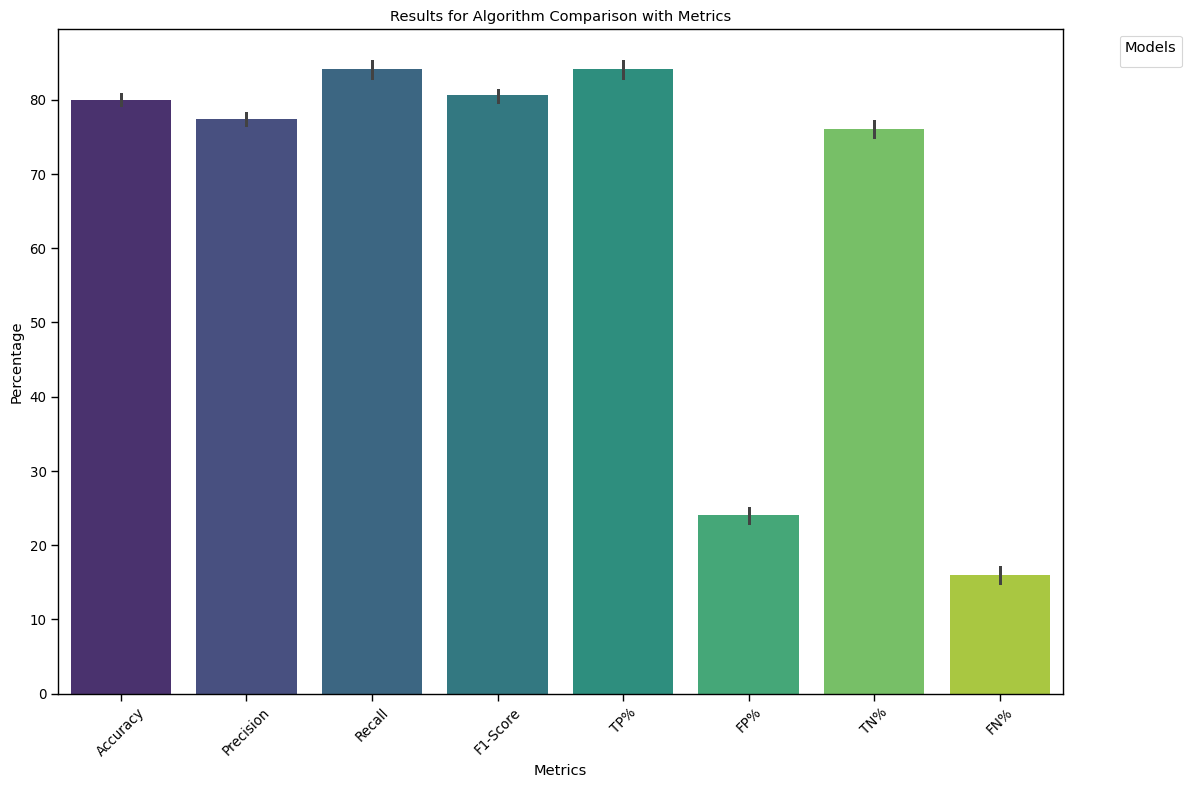

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, palette='viridis')
plt.title('Results for Algorithm Comparison with Metrics')
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Hyperparameter Tunning using grid search with cross-validation.

In [76]:
def print_classification_report(classifier, X, y):
    y_pred = classifier.predict(X)
    report = classification_report(y, y_pred)
    print("Classification Report:")
    print(report)

def hyperparameter_tuning_and_evaluation(model, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid):
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params


In [77]:
tuned_results = {}


### RandomForestClassifier (hyperparameter_tuning_and_evaluation)

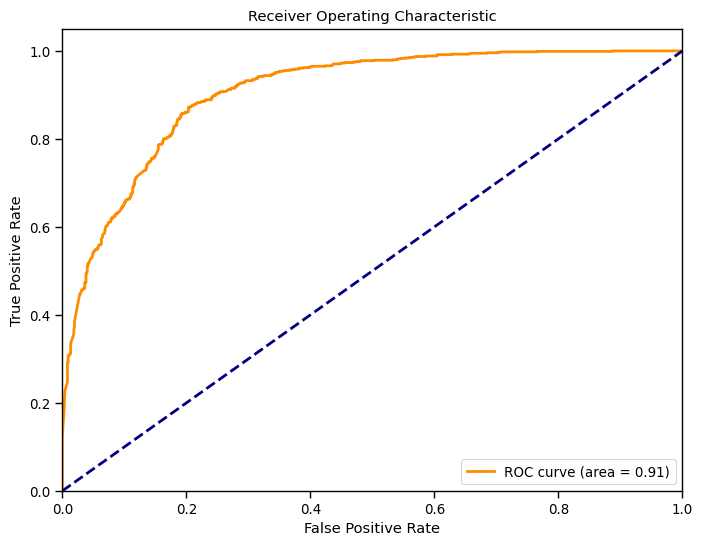

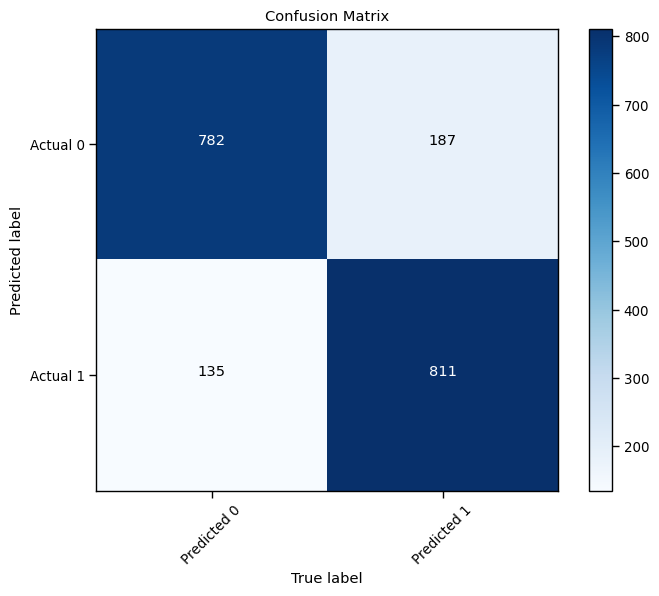

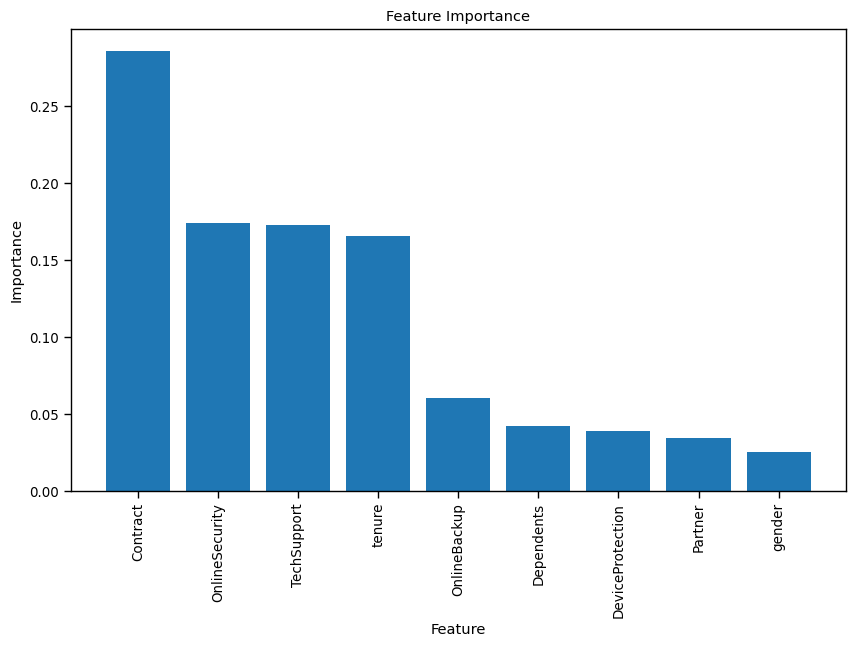


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       969
           1       0.81      0.86      0.83       946

    accuracy                           0.83      1915
   macro avg       0.83      0.83      0.83      1915
weighted avg       0.83      0.83      0.83      1915

Best Hyperparameters for RandomForest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [78]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_params = hyperparameter_tuning_and_evaluation(RandomForestClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('RandomForest', RandomForestClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['RandomForest'] = classifier_results

print("Best Hyperparameters for RandomForest:", best_params)


### XGBClassifier (hyperparameter_tuning_and_evaluation)

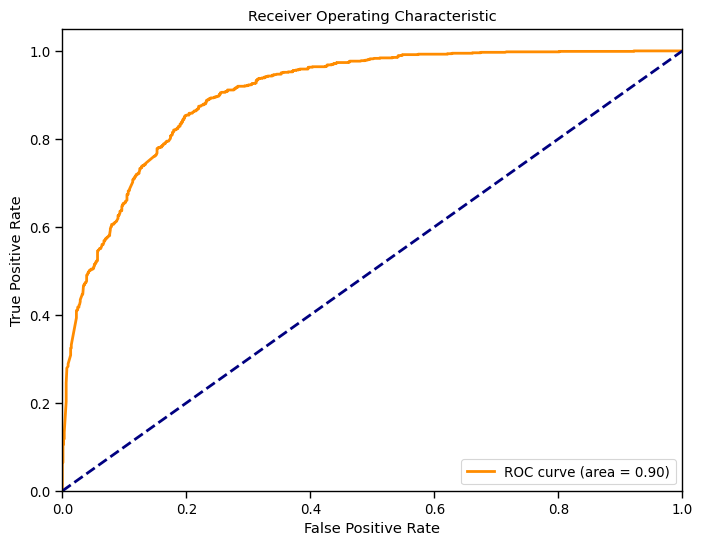

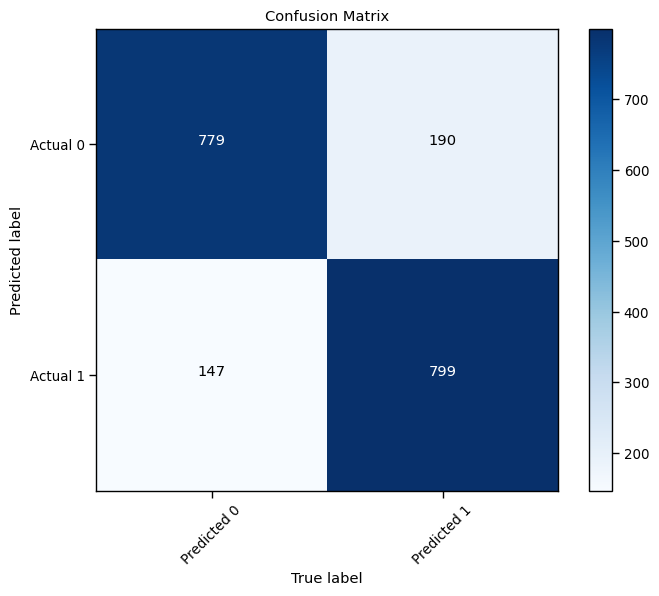

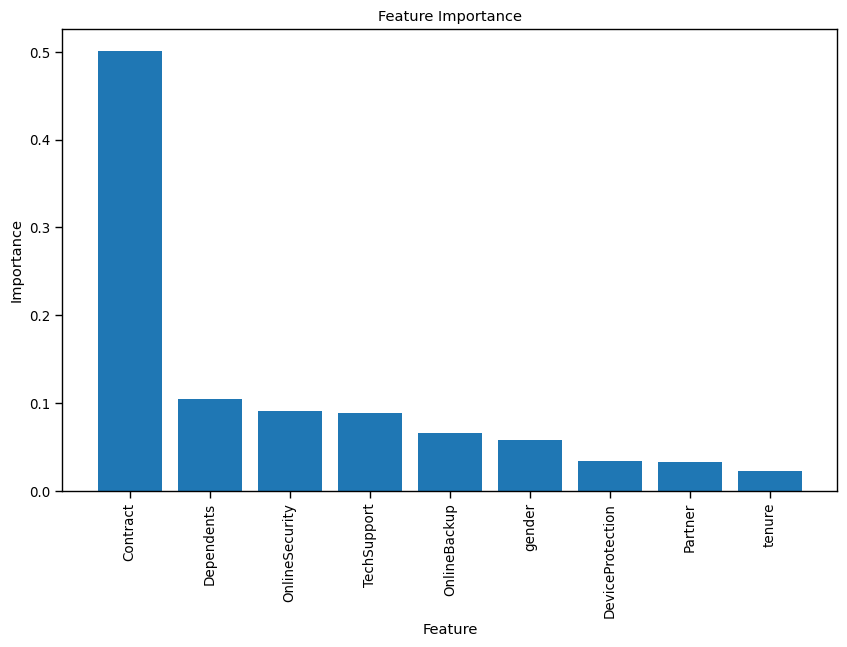


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       969
           1       0.81      0.84      0.83       946

    accuracy                           0.82      1915
   macro avg       0.82      0.82      0.82      1915
weighted avg       0.82      0.82      0.82      1915

Best Hyperparameters for XGBoost: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}


In [79]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

best_params = hyperparameter_tuning_and_evaluation(XGBClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('XGBoost', XGBClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['XGBoost'] = classifier_results

print("Best Hyperparameters for XGBoost:", best_params)


### MLPClassifier (hyperparameter_tuning_and_evaluation)

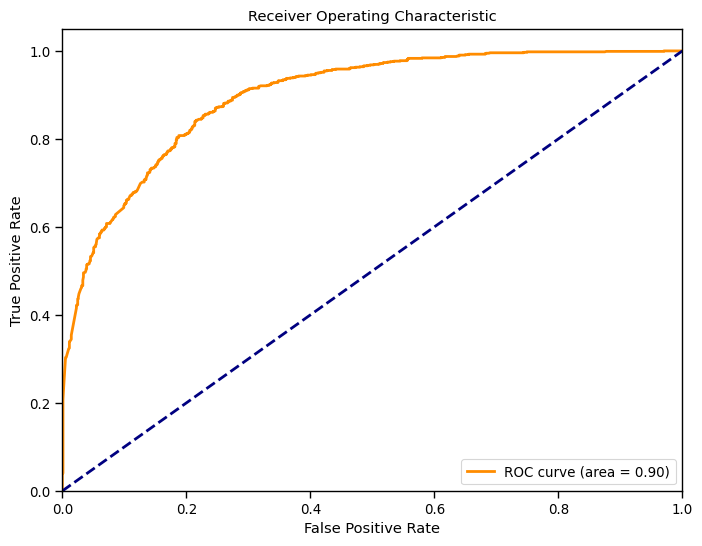

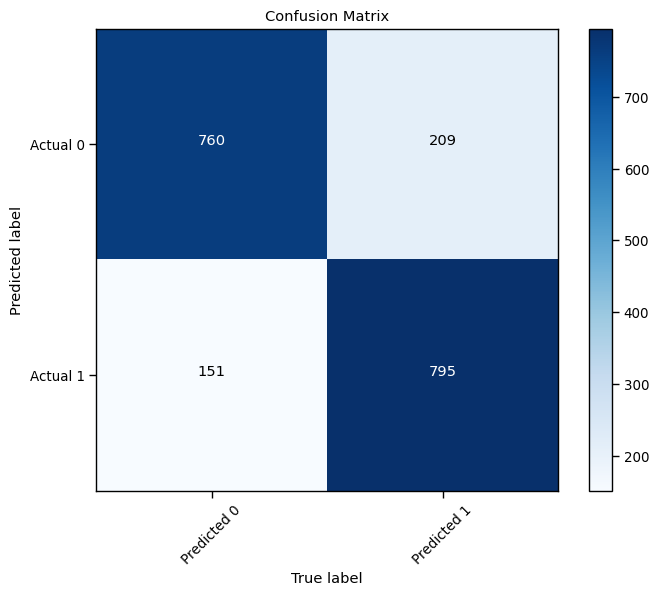

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       969
           1       0.79      0.84      0.82       946

    accuracy                           0.81      1915
   macro avg       0.81      0.81      0.81      1915
weighted avg       0.81      0.81      0.81      1915

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [80]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

best_params = hyperparameter_tuning_and_evaluation(MLPClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('MLPClassifier',MLPClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['MLPClassifier'] = classifier_results
print(best_params)


###  LGBMClassifier (hyperparameter_tuning_and_evaluation)

[LightGBM] [Info] Number of positive: 3841, number of negative: 3818
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 7659, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501502 -> initscore=0.006006
[LightGBM] [Info] Start training from score 0.006006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3841, number of negative: 3818
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the over

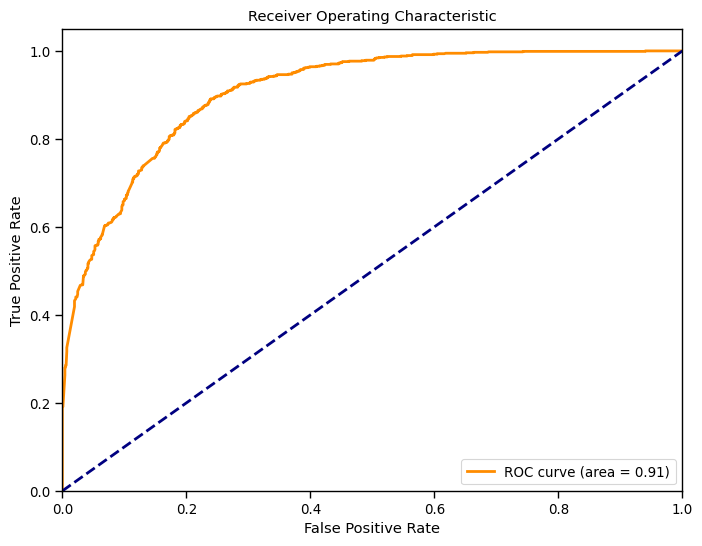

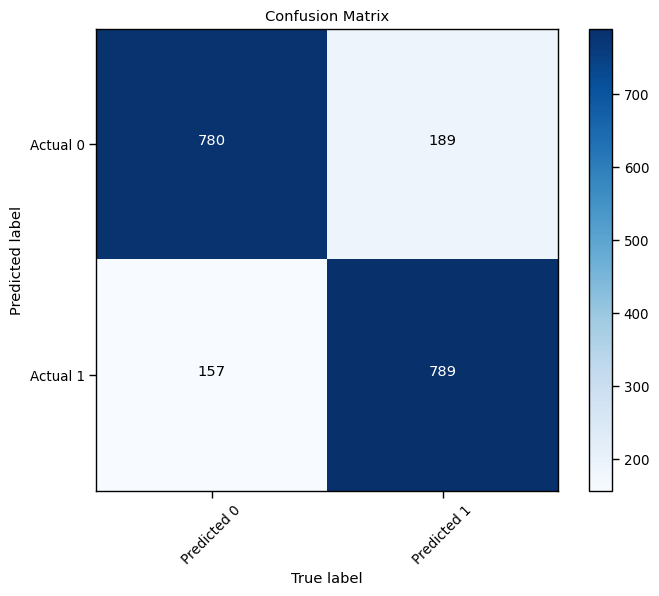

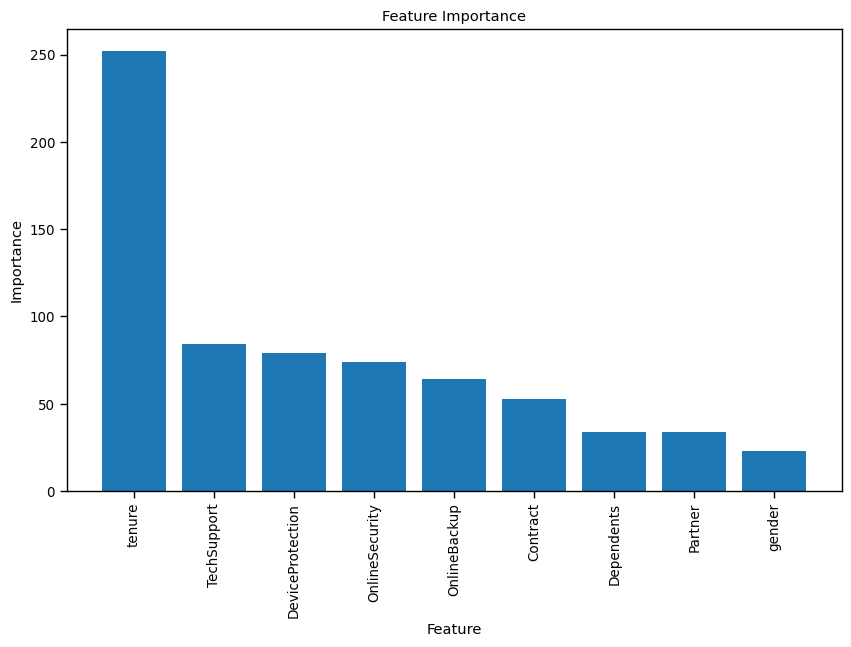


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       969
           1       0.81      0.83      0.82       946

    accuracy                           0.82      1915
   macro avg       0.82      0.82      0.82      1915
weighted avg       0.82      0.82      0.82      1915

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 31}


In [81]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127]
}

best_params = hyperparameter_tuning_and_evaluation(LGBMClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('LGBMClassifier', LGBMClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['LGBMClassifier'] = classifier_results
print(best_params)


### AdaBoostClassifier (hyperparameter_tuning_and_evaluation)

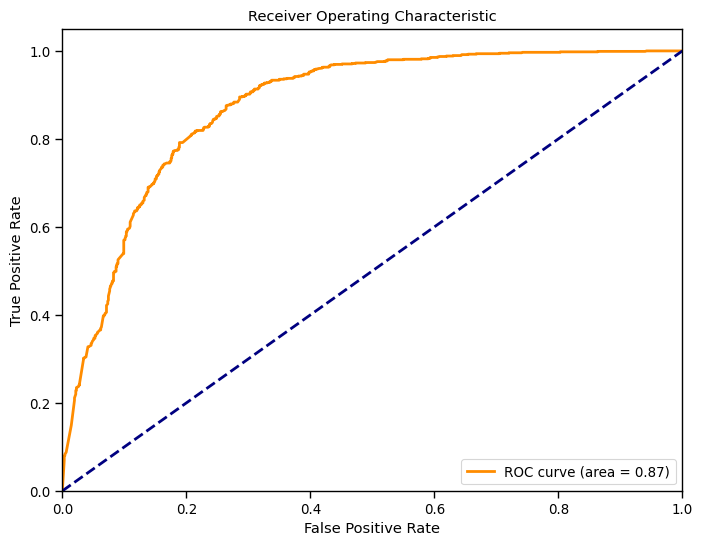

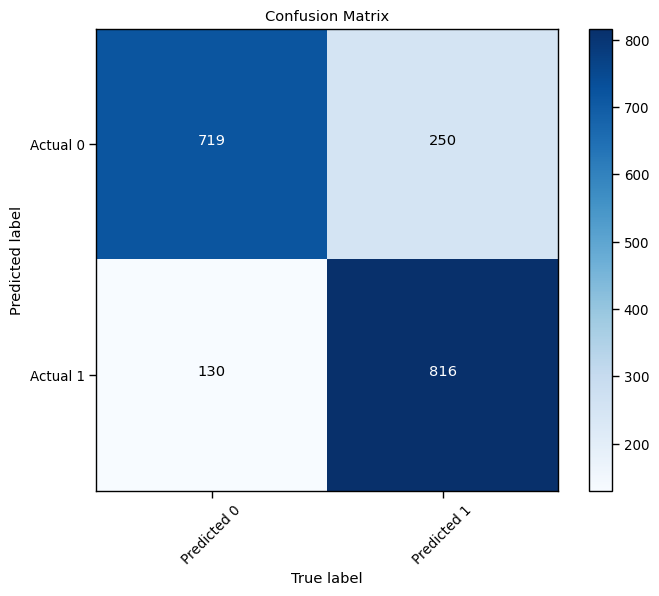

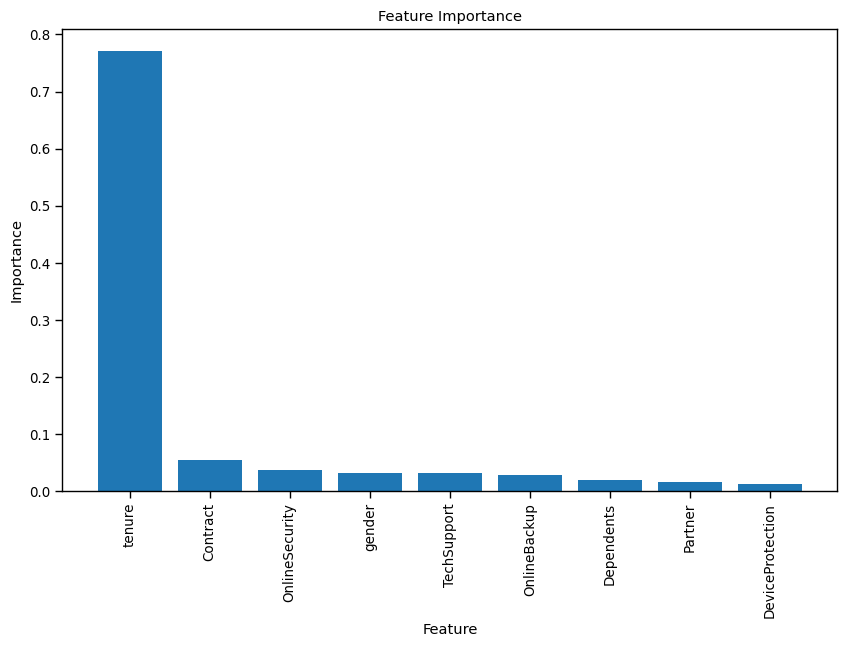


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       969
           1       0.77      0.86      0.81       946

    accuracy                           0.80      1915
   macro avg       0.81      0.80      0.80      1915
weighted avg       0.81      0.80      0.80      1915

{'learning_rate': 0.1, 'n_estimators': 1100}


In [82]:
param_grid = {
    'n_estimators': [700, 900, 1000, 1100, 1200],
    'learning_rate': [0.1, 0.5, 1.0],
}

best_params = hyperparameter_tuning_and_evaluation(AdaBoostClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('AdaBoostClassifier',AdaBoostClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['AdaBoostClassifier'] = classifier_results
print(best_params)

In [83]:
# # param_grid = {
# #     'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * Matern(length_scale=1.0)],
# # }
# param_grid = {
#     'kernel': [RBF(), Matern()]
# }
# best_params = hyperparameter_tuning_and_evaluation(GaussianProcessClassifier(), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
# classifier_results = model('GaussianProcess', GaussianProcessClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
# tuned_results['GaussianProcess'] = classifier_results
# print(best_params)

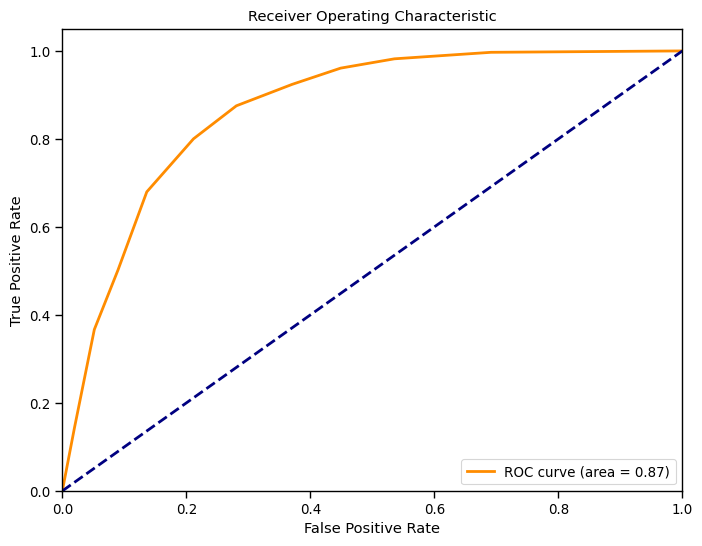

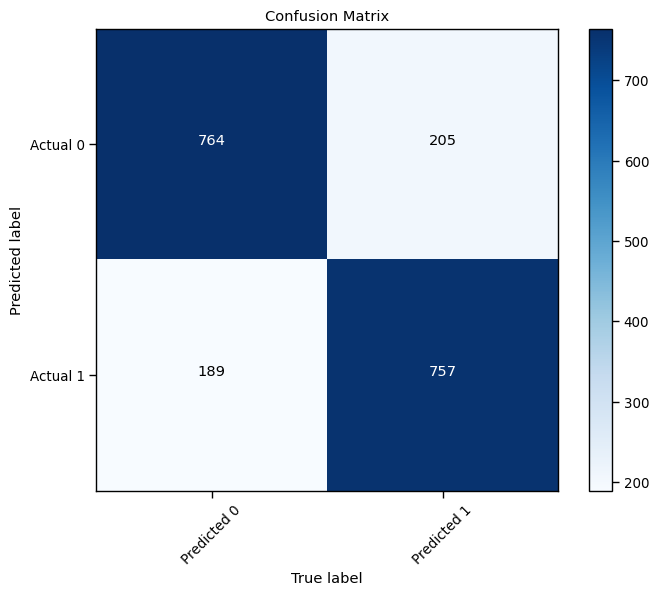

Classifier does not have feature importances.

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       969
           1       0.79      0.80      0.79       946

    accuracy                           0.79      1915
   macro avg       0.79      0.79      0.79      1915
weighted avg       0.79      0.79      0.79      1915

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [84]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

best_params = hyperparameter_tuning_and_evaluation(KNeighborsClassifier(), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('KNN', KNeighborsClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['KNN'] = classifier_results
print(best_params)



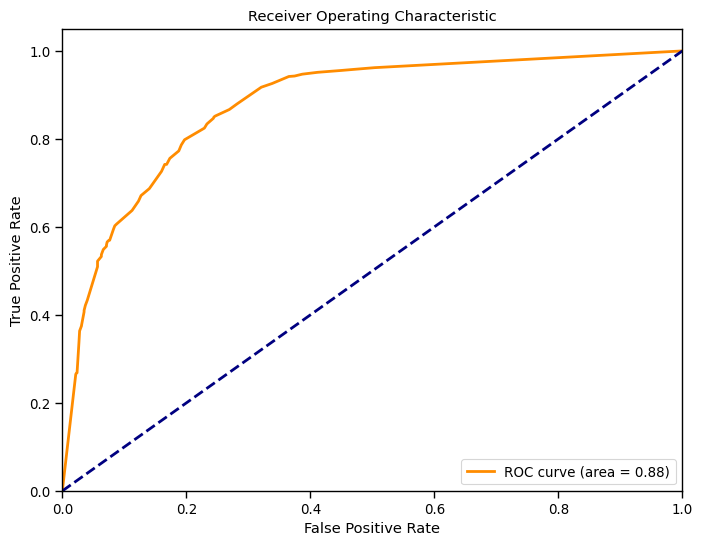

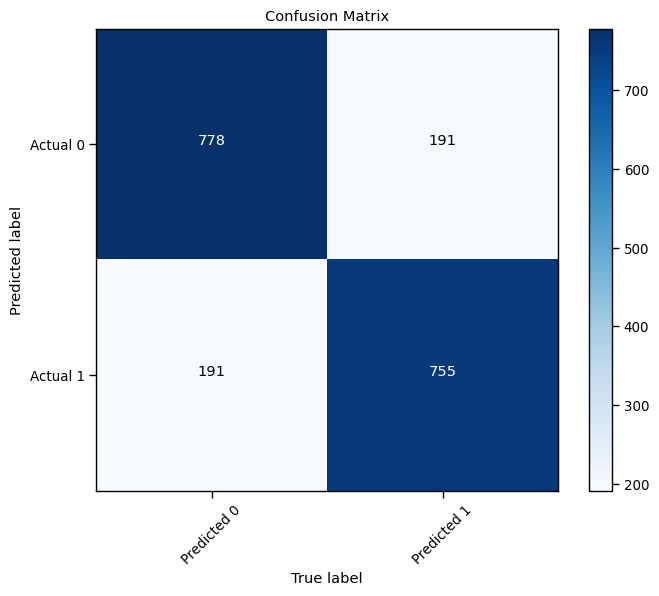

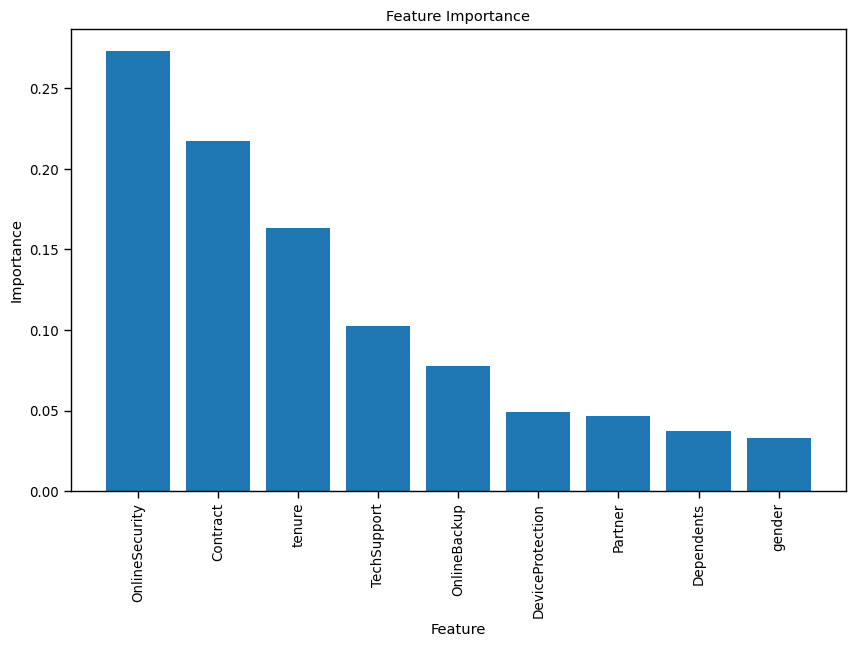


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       969
           1       0.80      0.80      0.80       946

    accuracy                           0.80      1915
   macro avg       0.80      0.80      0.80      1915
weighted avg       0.80      0.80      0.80      1915

{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [85]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [15, 25, 35, 45],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

best_params = hyperparameter_tuning_and_evaluation(DecisionTreeClassifier(random_state=42), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, param_grid)
classifier_results = model('DecisionTree', DecisionTreeClassifier(**best_params), X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
tuned_results['DecisionTree'] = classifier_results
print(best_params)


In [86]:
for key,val in tuned_results.items():
    tuned_results[key] = [round(i*100,2) for i in val]

# # Iterate over each item in tuned_results and round the values to two decimal places
# tuned_results = {key: [round(val_item * 100, 2) for val_item in val] for key, val in tuned_results.items()}


In [87]:
tuned_df = pd.DataFrame.from_dict(tuned_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
tuned_df = tuned_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
tuned_df

Accuracy  Precision  Recall  F1-Score    TP%    FP%  \
RandomForest           83.19      81.26   85.73     83.44  85.73  19.30   
XGBoost                82.40      80.79   84.46     82.58  84.46  19.61   
LGBMClassifier         81.93      80.67   83.40     82.02  83.40  19.50   
MLPClassifier          81.20      79.18   84.04     81.54  84.04  21.57   
AdaBoostClassifier     80.16      76.55   86.26     81.11  86.26  25.80   
DecisionTree           80.05      79.81   79.81     79.81  79.81  19.71   
KNN                    79.43      78.69   80.02     79.35  80.02  21.16   

                      TN%    FN%  
RandomForest        80.70  14.27  
XGBoost             80.39  15.54  
LGBMClassifier      80.50  16.60  
MLPClassifier       78.43  15.96  
AdaBoostClassifier  74.20  13.74  
DecisionTree        80.29  20.19  
KNN                 78.84  19.98

Data imbalance poses a challenge where one class significantly outnumbers another, potentially skewing model performance. Using SMOTE from imblearn.over_sampling helps mitigate this by synthetically generating minority class samples, achieving a more balanced dataset. This technique enhances model training and improves predictive accuracy by ensuring each class contributes more equally to the learning process

In [ ]:
# applying SMOTE
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
class_distribution_before = Counter(y_train)

# Get class distribution after SMOTE
class_distribution_after = Counter(y_train_smote)


In [ ]:

# Plot class distribution before and after SMOTE
plt.figure(figsize=(10, 6))
plt.bar(class_distribution_before.keys(), class_distribution_before.values(), color='blue', alpha=0.5, label='Before SMOTE')
plt.bar(class_distribution_after.keys(), class_distribution_after.values(), color='orange', alpha=0.7, label='After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before and After SMOTE')
plt.legend()
plt.show()


In [ ]:

# Print class counts before and after SMOTE
print("Class Counts Before SMOTE:", class_distribution_before)
print("Class Counts After SMOTE:", class_distribution_after)

### K-Nearest Neighbors (KNN)

In [ ]:
# using KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 6) 
knn_model.fit(X_train_smote, y_train_smote)
predict_knn_s_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy :",accuracy_knn)

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
train_accuracy_knn = knn_model.score(X_train_smote, y_train_smote)
test_accuracy_knn = knn_model.score(X_test, y_test)
# Print both the training and test accuracies
print("KNN training accuracy:", train_accuracy_knn)
print("KNN test accuracy:", test_accuracy_knn)

It appears that the training accuracy is approximately 82.38%, while the test accuracy is approximately 71.14%. This suggests that the model performs slightly better on the training data compared to the test data, indicating some degree of overfitting. However, the test accuracy is still reasonable

### Rebuild kNN Classification model using different value k (5-10)

In [ ]:
# List of k values
k_values = [ 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Dictionary to store accuracy scores for each k
accuracy_scores = {}

# Loop through each k value
for k in k_values:
    # Initialize kNN model with the current k value
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the kNN model
    knn_model.fit(X_train_smote, y_train_smote)
    
    # Calculate the test accuracy
    accuracy = knn_model.score(X_test, y_test)
    
    # Store the accuracy score for the current k value
    accuracy_scores[k] = accuracy

    # Print the test accuracy for the current k value
    print(f"Test accuracy for k={k}: {accuracy:.4f}")

# Print the accuracy scores for all k values
print("\nAccuracy scores for all k values:")
for k, accuracy in accuracy_scores.items():
    print(f"k={k}: {accuracy:.4f}")

### Interpretation

* The accuracy scores vary slightly across different values of k, ranging from 70.36% to 72.57%.
* Despite the variations, the accuracy scores remain relatively close to each other, indicating consistent performance.
* This reinforces the robustness of the model, as it maintains reasonably high accuracy across a range of k values.
* To gain deeper insights into the model's performance and the types of errors it makes,
* It's recommended to complement accuracy analysis with a confusion matrix. This will provide a more comprehensive understanding of the model's strengths and weaknesses in classifying different classes

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predict_knn_s_y)
print("KNN Confusion Matrix:")
print(cm)

In [ ]:
# Plot confusion matrix with annotated values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add text annotations for each cell
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='red')

plt.show()

### Classification metrics for KNN

In [ ]:
print(classification_report(y_test, predict_knn_s_y))

In [ ]:
#  plotting the Receiver Operating Characteristic (ROC) curve for KNN
predict_knn_y = dt_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, predict_knn_s_y)
# Calculate the Area Under the ROC Curve (AUC-ROC) for Decision Tree
auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve for Decision Tree
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label=f'Decision Tree (AUC = {auc_knn:.3f})', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

### Using SVM Model

In [ ]:
# using SVM Model
svc_model = SVC(random_state=1, probability=True)
svc_model.fit(X_train_smote, y_train_smote)
predict_svm_s_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

### Train and Test Accuracy and check for Overfitting 
* Compare the train-set and test-set accuracy
* Now, I will compare the train-set and test-set accuracy to check for overfitting

In [ ]:
# Calculate test-set accuracy
test_accuracy = accuracy_score(y_test, predict_svm_s_y)

print("Train-set Accuracy:", train_accuracy)
print("Test-set Accuracy:", test_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

## Perform Cross_Validation on SVC

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(svc_model, X_train_smote, y_train_smote, cv=5)  # cv=5 for 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, predict_svm_s_y)

print("SVM Confusion Matrix:")
print(cm)

In [ ]:
# Plot confusion matrix for SVM with annotated values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add text annotations for each cell
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black')

plt.show()

### Classification Metrics for SVC

In [ ]:
# Classification Matrics
print(classification_report(y_test, predict_svm_s_y))

### SVM ROC - AUC

In [ ]:
hpredict_svc_y = svc_model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr) for the ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, predict_svc_y)

# Calculate the Area Under the ROC Curve (AUC-ROC) for SVM
auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve for SVM
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {auc_svc:.3f})', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

### RandomForestClassifier Model

In [ ]:
# using RandomForestClassifier Model
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train_smote, y_train_smote)

# Make predictions
predict_rf_s_y = model_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, predict_rf_s_y)
print("Random Forest Accuracy for undersample:", accuracy_rf)

In [ ]:
print(classification_report(y_test, predict_rf_s_y))

In [ ]:
cm = confusion_matrix(y_test, predict_rf_s_y)

print("Random Forest Class Confusion Matrix:")
print(cm)

In [ ]:
# Plot confusion matrix with annotated values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add text annotations for each cell
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black')

plt.show()

In [ ]:
# Using Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_smote, y_train_smote)
predict_dt_s_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

In [ ]:
print(classification_report(y_test, predict_dt_s_y))

In [ ]:
# Plot confusion matrix with annotated values
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add text annotations for each cell
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [ ]:
# Confusion Matrix Decision Tree
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_dt_s_y),
            annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Purples")

plt.title("DECISION TREE CONFUSION MATRIX", fontsize=15)
plt.show()


In [ ]:
#  plotting the Receiver Operating Characteristic (ROC) curve for DECISION TREE
predict_dt_y = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, predict_dt_s_y)
# Calculate the Area Under the ROC Curve (AUC-ROC) for Decision Tree
auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for Decision Tree
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Using Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)
predict_nb_s_y = nb_model.predict(X_test)
print("Naive Bayes Classifier Accuracy:" , accuracy_score(y_test, predict_nb_s_y))

In [ ]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.
y_pred_train = predict_nb_s_y (X_train_smote)

y_pred_train      y_pred_train = gnb.predict(X_train)

y_pred_train                                                       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForestClassifier model
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                   random_state=50, max_features="auto",
                                   max_leaf_nodes=30)

# Train the model
model_rf.fit(o_x_train, o_y_train)

# Make predictions
predict_rf_y = model_rf.predict(X_test)



In [ ]:
print(classification_report(y_test, predict_nb_y))

In [ ]:
# Confusion Matrix Naive Bayes
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_nb_s_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3, cmap="Greens" )
    
plt.title("Naive Bayes Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
#  plotting the Receiver Operating Characteristic (ROC) curve for Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities for the positive class
predict_nb_y_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predict_nb_y_prob)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve for Naive Bayes
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.3f})', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve', fontsize=15)
plt.legend(loc='lower right')
plt.show()